## **Kata Pengantar**
Supermarket "Fiction Mart" adalah perusahaan ritel yang tengah berusaha meningkatkan penjualan pada berbagai platform, seperti situs web, katalog, dan toko fisik, serta meningkatkan penjualan lini produknya diantaranya seperti anggur (wines), buah-buahan (fruits), daging (meat), ikan (fish), makanan manis (sweet), dan bahkan perhiasan emas (gold). Untuk mencapai tujuan ini, tim Sales & Marketing telah memulai sebuah inisiatif penting.

Mereka memutuskan untuk melihat lebih dekat pada data transaksi pelanggan yang telah menjadi anggota loyal mereka dalam rentang waktu dari pertengahan 2012 hingga pertengahan 2014. Tujuan utama dari analisis ini adalah untuk menggali wawasan tentang profil pelanggan, yang mencakup faktor-faktor seperti tingkat pendidikan (Education), status perkawinan (Marital Status), pendapatan (Income), dan jumlah anak dalam keluarga. Selain itu, tim juga akan memeriksa pola transaksi pelanggan, termasuk frekuensi transaksi, total pengeluaran transaksi, seberapa baru pelanggan tersebut berbelanja (Recency), serta adanya keluhan atau komplain (Complain) yang mereka sampaikan.

Hasil dari analisis mendalam terhadap data ini akan menjadi kunci bagi tim Sales & Marketing dalam mengidentifikasi segmen pelanggan yang memiliki potensi besar untuk meningkatkan penjualan pada lini produk dan platform. Dengan wawasan yang diperoleh dari data ini, mereka akan dapat mengarahkan strategi pemasaran yang lebih terfokus dan efektif, serta memberikan pengalaman berbelanja yang lebih personal kepada pelanggan. Dengan harapan, langkah-langkah ini akan membantu "Fiction Mart" mencapai tingkat penjualan yang lebih tinggi dan menjadikannya salah satu supermarket pilihan utama bagi para pelanggan setia mereka.

## **Rumusan Masalah**

 >1. Bagaimana pola transaksi pelanggan supermarket?<br>
 >2. Apa saja karakteristik atau profil pelanggan supermarket? apakah karakteristik pelanggan berkaitan dengan pola transaksi pelanggan?<br>
 >3. Bagaimana performansi penjualan lini produk?
 >4. Bagaimana performansi platform transaksi supermarket? bagaimana karakteristik dan pola transaksi pelanggan dapat mempengaruhi frekuensi traksaksi dari setiap platform?



# **0. Import Library**

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=38
df=pd.read_csv('Supermarket Customers.csv',sep='\t')

# **1. Data Understanding**

In [2]:
# 5 data pertama
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# Kolom pada data
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Berikut merupakkan penjelasan beserta pengkategorian kolom pada dataset supermarket

| Kategori               | Kolom                            | Penjelasan                                                   |
|:------------------------|:----------------------------------|:--------------------------------------------------------------|
| Data Pribadi                 | ID                               | Identifikasi unik pelanggan                                  |
|                        | Year_Birth                       | Tahun kelahiran pelanggan                                    |
|                        | Education                        | Tingkat pendidikan pelanggan                                 |
|                        | Marital_Status                   | Status pernikahan pelanggan                                  |
|                        | Income                           | Pendapatan tahunan rumah tangga pelanggan                     |
|                        | Kidhome                          | Jumlah anak-anak dalam rumah tangga pelanggan                |
|                        | Teenhome                         | Jumlah remaja dalam rumah tangga pelanggan                   |
|                        | Dt_Customer                      | Tanggal pendaftaran keanggotaan pelanggan dengan supermarket               |
|                        | Recency                          | Jumlah hari sejak pembelian terakhir pelanggan                |
|                        | Complain                         | 1 jika pelanggan mengajukan komplain dalam 2 tahun terakhir, 0 lainnya  |
| Lini Produk               | MntWines                         | Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir   |
|                        | MntFruits                        | Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir |
|                        | MntMeatProducts                  | Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir |
|                        | MntFishProducts                  | Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir |
|                        | MntSweetProducts                 | Jumlah yang dihabiskan untuk produk permen dalam 2 tahun terakhir |
|                        | MntGoldProds                     | Jumlah yang dihabiskan untuk produk emas dalam 2 tahun terakhir |
| Promotion              | NumDealsPurchases                | Jumlah pembelian dengan diskon                               |
|                        | AcceptedCmp1                     | 1 jika pelanggan menerima tawaran dalam kampanye pertama, 0 lainnya |
|                        | AcceptedCmp2                     | 1 jika pelanggan menerima tawaran dalam kampanye kedua, 0 lainnya |
|                        | AcceptedCmp3                     | 1 jika pelanggan menerima tawaran dalam kampanye ketiga, 0 lainnya |
|                        | AcceptedCmp4                     | 1 jika pelanggan menerima tawaran dalam kampanye keempat, 0 lainnya |
|                        | AcceptedCmp5                     | 1 jika pelanggan menerima tawaran dalam kampanye kelima, 0 lainnya |
|                        | Response                         | 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 lainnya |
| Platform                  | NumWebPurchases                   | Jumlah pembelian melalui situs web perusahaan                 |
|                        | NumCatalogPurchases               | Jumlah pembelian dengan menggunakan katalog                   |
|                        | NumStorePurchases                | Jumlah pembelian langsung di toko                            |
|                        | NumWebVisitsMonth                 | Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir |


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# deep info
stats = []
for column in df.columns:
    dtype = df[column].dtype
    null_count = df[column].isnull().sum()
    null_pct = round((null_count / len(df)) * 100,2)
    unique_count = df[column].nunique()
    unique_sample = df[column].dropna().sample(min(2, unique_count)).tolist()

    stats.append({
        'Kolom Data': column,
        'Tipe Data': dtype,
        'Null': null_count,
        'nullPct(%)': null_pct,
        'unique': unique_count,
        'uniqueSample': unique_sample
    })

pd.DataFrame(stats)

,Kolom Data,Tipe Data,Null,nullPct(%),unique,uniqueSample
0,ID,int64,0,0.00,2240,"[4329, 7829]"
1,Year_Birth,int64,0,0.00,59,"[1975, 1951]"
2,Education,object,0,0.00,5,"[Graduation, Graduation]"
3,Marital_Status,object,0,0.00,8,"[Widow, Together]"
4,Income,float64,24,1.07,1974,"[18746.0, 49681.0]"
5,Kidhome,int64,0,0.00,3,"[0, 0]"
6,Teenhome,int64,0,0.00,3,"[0, 1]"
7,Dt_Customer,object,0,0.00,663,"[23-06-2014, 25-09-2012]"
8,Recency,int64,0,0.00,100,"[75, 90]"
9,MntWines,int64,0,0.00,776,"[97, 46]"


In [6]:
#Menjabarkan nilai statistik numerik
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# Latar belakang pendidkan anggota membership supermarket
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

**Graduation** ,**Master**, **PhD**, adalah gelar yang umum yaitu lulusan sarjana, magister, dan doktorat.<br>
**2nd cycle** merupakan gelar yang ekuivalen dengan dengan gelar **master** di negara negara yang turut menandatangani perjanjian Bologna dalam standarisasi pendidikan tinggi di eropa.<br>
**Basic** dapat diartikan sebagai telah menempuh pendidikan dasar, atau tidak menempuh perguruan tinggi

In [8]:
# Latar belakang relationship anggota membership supermarket
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

**Single**, **Together**, **Divorced** akan menjadi acuan dalam `Marital_Status`<br>
**Widow** dapat dikategorikan sebagai **Divorced**<br>
**Alone** dapat dikategorikan sebagai **Single**<br>
**Married** dapat dikategorikan sebagai **Together**, karena **Married** bisa dipastikan **Together**, tapi **Together** belum tentu **Married**<br>
**Absurd** dapat dikategorikan sebagai **Together**, dapat diartikan sebagai seseorang yang hubungannya tidak dipahami oleh dirinya sendiri<br>
**YOLO** dapat dikategorikan sebagai **Single**, **YOLO** atau 'You Only Lived Onve' dapat diartikan oleh orang yang menganggap dirinya bebas melakukan apa saja tanpa terikat ikatan apapun

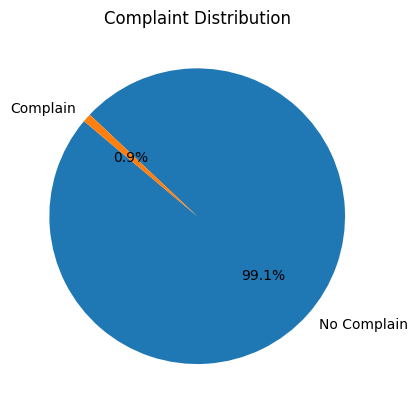

Complain
0           2219
1             21
dtype: int64

In [9]:
# Menghitung jumlah masing-masing nilai dalam kolom 'Complain'
complain_counts = df['Complain'].value_counts()

# Mengganti label indeks
complain_counts.index = ['No Complain', 'Complain']

# Membuat diagram lingkaran dengan persentase
plt.pie(complain_counts, labels=complain_counts.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Complaint Distribution')

# Menampilkan diagram lingkaran
plt.show()
display(df[['Complain']].value_counts())

**Data Finding**
- Terdapat 29 Kolom dan 2240 Baris Data pada dataset yang terdiri dari integer,object dan float
- Pada kolom Income terdapat 24 missing value yang dapat diisi dengan menganalisa background pendidikan, anggota keluarga beserta pendapatannya
- Pada Kolom `AcceptedCmp` 1-5 terlihat tidak berurutan dari `AttemptedCmp1` ke `AttemptedCmp5`.
- ditemukan adanya data duplicate namun dengan ID yang berbeda.
- rentang Recency dari 0-99, nilai maksimum 99 dapat menimbulkan kemungkinan data tercatat hanya hingga 99 hari.
- Ditemukan terdapat **0.9%** dari 2240 Pelanggan yang mengajukan complain

# **2. Data Cleaning & Preparation**

### **2.1 Changing Data Types**

`Dt_customer` merupakan memiliki isi value berupa tanggal, namun tipe datanya masih object maka diperlukan mengganti tipe datanya menjadi datetime

In [10]:
# Mengubah tipe data object ke datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### **2.2 Removing Duplicate**

Pada bagian ini akan memeriksa data duplikat setiap barisnya

In [12]:
# menampilkan dataframe data duplikasi dengan ID yang berbeda namun data lainnya identik
display(df[df.duplicated(subset=df.columns.difference(['ID']),keep=False)].sort_values('Income'),df[df.duplicated(subset=df.columns.difference(['ID']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
30,6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1138,10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1203,234,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
260,10264,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
558,8420,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,5536,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1
1301,6024,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1
943,5386,1953,Graduation,Together,94384.0,0,0,2013-03-04,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1
650,4248,1960,Master,Single,98777.0,0,0,2014-02-17,23,1000,19,711,125,115,38,0,4,6,9,1,0,1,0,0,0,0,3,11,0


(182, 29)

Terdapat **182** Baris dengan `ID` yang berbeda namun memiliki data lainnya yang identik/duplikasi oleh karena itu tindakan terbaik yang dilakukan yaitu drop nilai yang identik

In [13]:
# menghapus baris-baris yang memiliki nilai yang sama dalam semua kolom kecuali kolom 'ID' dalam DataFrame df
df.drop_duplicates(subset=df.columns.difference(['ID']),inplace=True)
df[df.duplicated(subset=df.columns.difference(['ID']))]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


182 Baris Identik telah di Drop

In [14]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Response']),keep=False)].sort_values('Income').head(10),df[df.duplicated(subset=df.columns.difference(['ID','Response']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
548,9671,1968,Graduation,Married,19514.0,1,1,2014-01-26,47,14,3,21,2,1,28,4,3,1,2,8,1,0,0,0,0,0,3,11,1
1008,8975,1968,Graduation,Married,19514.0,1,1,2014-01-26,47,14,3,21,2,1,28,4,3,1,2,8,1,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
408,5049,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,0
1614,6215,1977,Graduation,Married,31353.0,1,1,2013-12-29,24,10,0,10,3,1,7,2,1,1,2,8,0,0,0,0,0,0,3,11,1
195,7224,1977,Graduation,Married,31353.0,1,1,2013-12-29,24,10,0,10,3,1,7,2,1,1,2,8,0,0,0,0,0,0,3,11,0
1426,8254,1974,PhD,Married,34596.0,1,0,2013-04-13,48,14,0,2,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,0
968,2620,1974,PhD,Married,34596.0,1,0,2013-04-13,48,14,0,2,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,1
1715,10340,1984,Graduation,Together,35196.0,1,0,2012-11-13,68,75,12,141,43,39,187,6,6,1,5,8,0,0,0,0,0,0,3,11,0
1048,8870,1984,Graduation,Together,35196.0,1,0,2012-11-13,68,75,12,141,43,39,187,6,6,1,5,8,0,0,0,0,0,0,3,11,1


(19, 29)

Terdapat **19** baris yang `ID` dan `Response` nya berbeda tapi data lainnya identik

In [15]:
# menghapus baris-baris yang memiliki nilai yang sama dalam semua kolom kecuali kolom 'ID' dan 'Response' dalam DataFrame df
df.drop_duplicates(subset=df.columns.difference(['ID','Response']),inplace=True)
df[df.duplicated(subset=df.columns.difference(['ID','Response']))]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


19 Baris identik telah di Drop

In [16]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']),keep=False)].sort_values('Income'),df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
842,3312,1988,Graduation,Single,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
1063,2055,1973,PhD,Divorced,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,0
1595,1041,1973,PhD,Single,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2188,10652,1957,Master,Together,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0


(4, 29)

Terdapat **4** baris yang duplikat disini data yang dipilih adalah data dengan `Marital_Status` yang umum yaitu **Single**, **Divorced** atau **Together**.

In [17]:
df.drop([153,138,2177,2134],inplace=True)

In [18]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']),keep=False)].sort_values('Income'),df[df.duplicated(subset=df.columns.difference(['ID','Marital_Status','Education','Response']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


(0, 29)

In [19]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Income','Education','Response','Marital_Status']),keep=False)].sort_values('Recency'),df[df.duplicated(subset=df.columns.difference(['ID','Income']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1386,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1392,10146,1972,PhD,Together,38887.0,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0
620,2782,1961,PhD,Married,54456.0,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
534,8724,1982,Graduation,Single,28567.0,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
1917,4385,1981,PhD,Single,36038.0,1,0,2013-05-31,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,3,11,0
2061,1612,1981,PhD,Single,NaN,1,0,2013-05-31,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,3,11,0


(4, 29)

Ada 4 data yang `ID` dan `Income` nya berbeda namun data lainnya sama, oleh karena itu baris yang di drop adalah baris dengan missing value 

In [20]:
df.drop([1386,128,58,2061],inplace=True)
display(df[df.duplicated(subset=df.columns.difference(['ID','Income','Education','Response','Marital_Status','Recency']),keep=False)].sort_values('Recency'),df[df.duplicated(subset=df.columns.difference(['ID','Income']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


(0, 29)

In [21]:
display(df[df.duplicated(subset=df.columns.difference(['ID','Income','Education','Response','Marital_Status']),keep=False)].sort_values('Recency'),df[df.duplicated(subset=df.columns.difference(['ID','Income']))].shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


(0, 29)

Secara kesuluruhan ditemukan 209 data duplikat yang telah di drop

### **2.3 Correcting values and Filling Missing Values**

In [22]:
#perbaikan nilai value pada kolom Education
df['Education'].value_counts()

Graduation    1023
PhD            437
Master         336
2n Cycle       186
Basic           49
Name: Education, dtype: int64

In [23]:
df['Education'].replace('2n Cycle', 'Master',inplace=True)
df['Education'].value_counts()

Graduation    1023
Master         522
PhD            437
Basic           49
Name: Education, dtype: int64

In [24]:
#perbaikan nilai value pada kolom Marital_Status
df['Marital_Status'].value_counts()

Married     787
Together    516
Single      443
Divorced    213
Widow        70
Alone         1
Absurd        1
Name: Marital_Status, dtype: int64

In [25]:
# perbaikan pada kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace(['Alone','YOLO'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd','Married'], 'Together')
df['Marital_Status'] = df['Marital_Status'].replace('Widow', 'Divorced')

df['Marital_Status'].value_counts()

Together    1304
Single       444
Divorced     283
Name: Marital_Status, dtype: int64

In [26]:
#perbaikan nilai missing value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 20
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

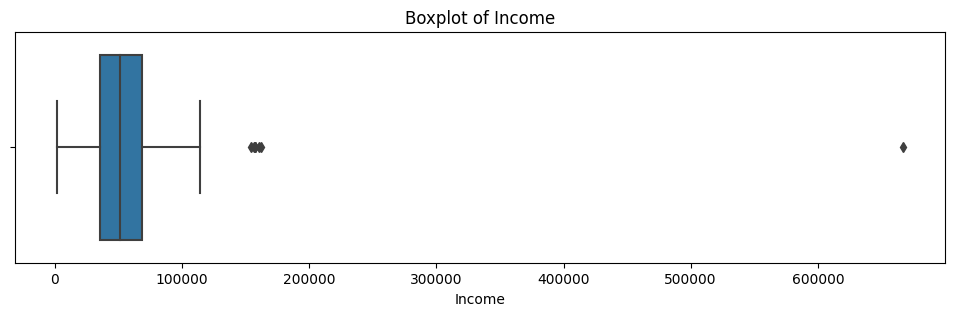

In [27]:
#menampilkan distribusi income dalam grafis boxplot
plt.figure(figsize=(12, 3))
sns.boxplot(df,x='Income')
plt.xlabel('Income')
plt.title('Boxplot of Income')
plt.show()

In [28]:
# Menentukan apakah data mengikuti distribusi normal
p_value = ss.kstest(df['Income'], 'norm').pvalue

alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Data 'Income' terdistribusi normal (tidak ada bukti untuk menolak H0)")
else:
    print("Data 'Income' tidak terdistribusi normal (ada bukti untuk menolak H0)")

Data 'Income' tidak terdistribusi normal (ada bukti untuk menolak H0)


Karena data `Income` tidak terdistribusi normal maka *missing value* pada kolom `Income` diisi dengan nilai **median**, dimana nilai median yang didapatkan dari pengelompokkan `Income` berdasarkan tingkat pendidikan (`Education`) dan jumlah anak (`Kidhome` dan `Teenhome`)

In [29]:
df.groupby(['Education','Kidhome','Teenhome'])[['Income']].median()

Income
Education  Kidhome Teenhome         
Basic      0       0         22390.0
                   1         23529.0
           1       0         18978.0
                   1         15535.0
Graduation 0       0         72407.0
                   1         59686.0
                   2         56799.5
           1       0         31089.0
                   1         42554.0
                   2         52464.5
           2       0         35771.5
                   1         35329.5
Master     0       0         72472.0
                   1         57733.5
                   2         59354.0
           1       0         33181.0
                   1         46014.0
                   2         37418.5
           2       0         19510.0
                   1         43993.0
PhD        0       0         74250.0
                   1         58482.0
                   2         61467.0
           1       0         34596.0
                   1         42673.0
                   2         51411.0
           2       0         38174.0
                   1         43484.0

In [30]:
#Menampilkan data dengan Income yang missing value
df[df['Income'].isna()==True].index
inan=df[df['Income'].isna()].index
df.loc[inan]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Together,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Master,Together,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Together,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
133,1295,1963,Graduation,Together,NaN,0,1,2013-08-11,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0
312,2437,1989,Graduation,Together,NaN,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0


In [31]:
#Mengisi nilai missing value dengan median
df['Income']=df['Income'].fillna(df.groupby(['Education', 'Kidhome', 'Teenhome'])['Income'].transform('median'))
df.loc[inan]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Together,31089.0,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,31089.0,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,74250.0,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,35329.5,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Master,Together,33181.0,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Together,43484.0,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,42554.0,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,72472.0,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
133,1295,1963,Graduation,Together,59686.0,0,1,2013-08-11,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0
312,2437,1989,Graduation,Together,72407.0,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0


In [32]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Missing Value sebanyak 20 pada kolom `Income` Telah diisi berdasarkan median dari Pendapatan berdasarkan Tingkat pendidikan dan jumlah anak

### **2.4 Handling Outlier**

Bagian ini akan memeriksa data numerik terhadap outlier

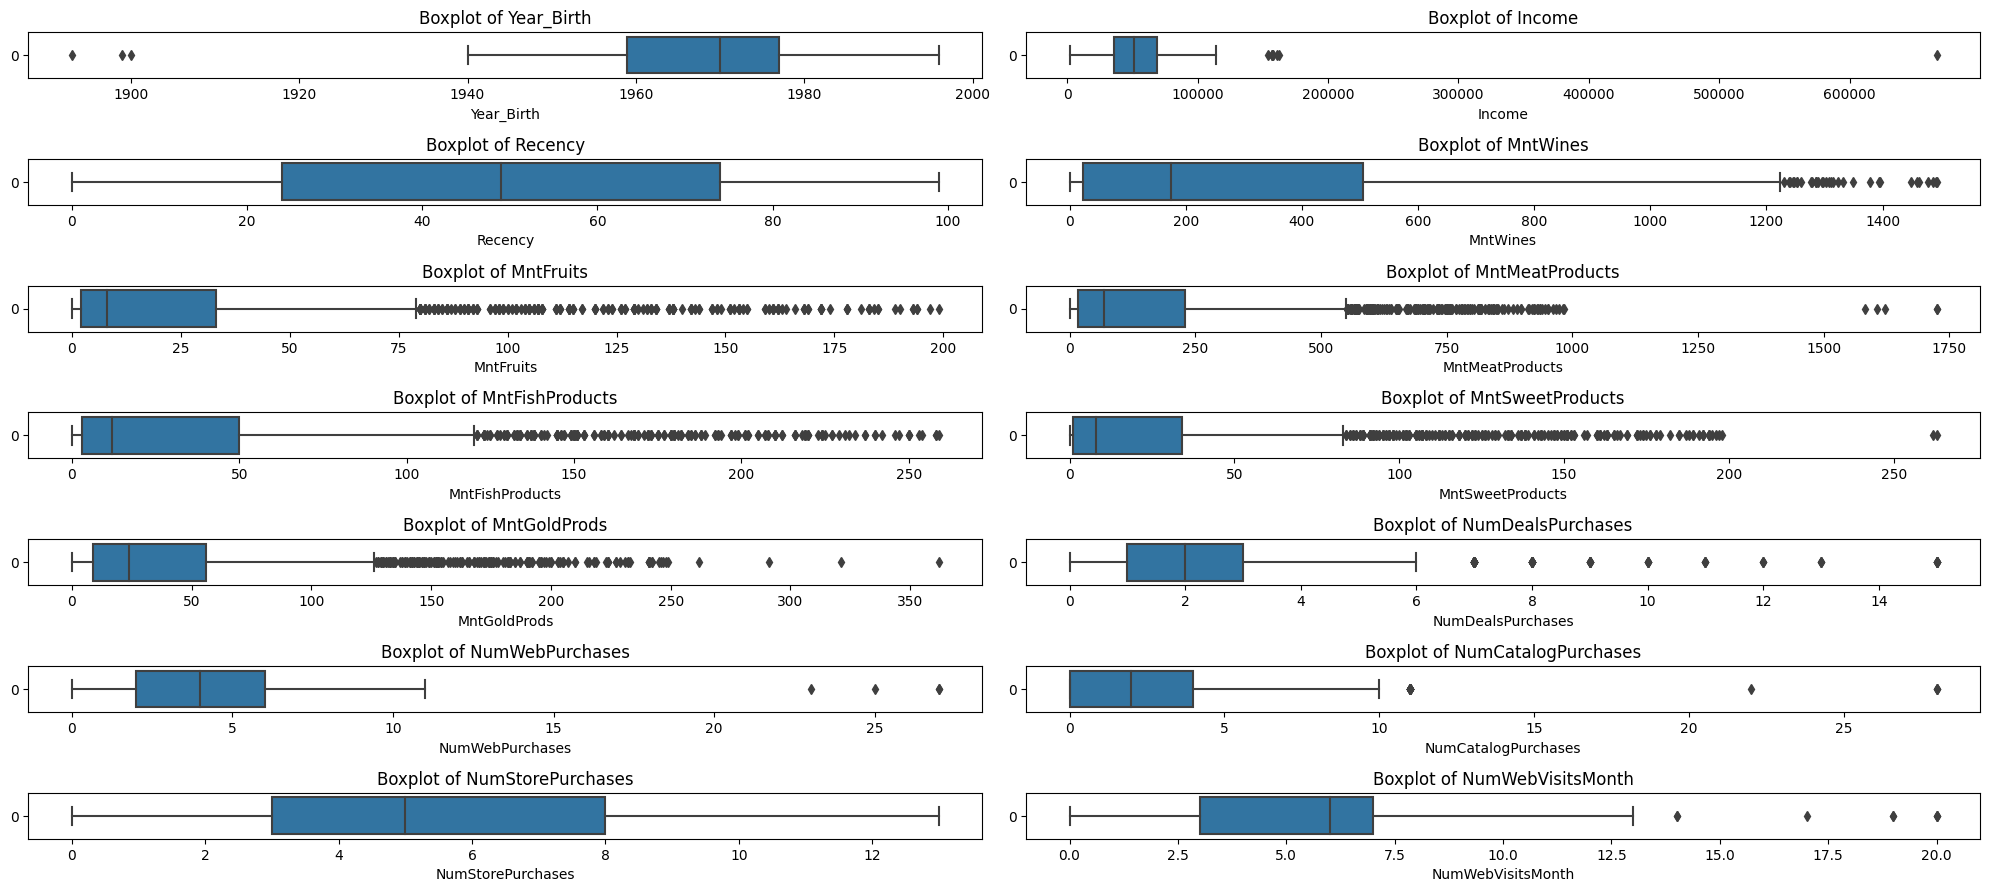

In [33]:
# Membuat plot kotak untuk setiap kolom numerik
kolNum = df[['Year_Birth','Income','Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

plt.figure(figsize=(20,20))
for i, column in enumerate(kolNum, 1):
    plt.subplot(16, 2, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()


Dari data numerik diatas terlihat bahwa

- Terdapat nilai outlier yang jauh dari rentang pada kolom `Year_Birth` dan `Income`. Hal ini menunjukkan bahwa terdapat beberapa data yang tidak sesuai dengan rentang yang diharapkan. Nilai outlier pada kolom `Year_Birth` dan `Income` dapat disebabkan oleh kesalahan input data, 
- Dalam kolom yang menunjukkan pengeluaran konsumen(`MntWines`, `MntFruits`, `MntMeatProducts`,`MntFishProducts`, `MntSweetProducts`,`MntGoldProds`) terdapat sebaran data yang menonjolkan titik hitam sebagai outlier. Namun, penting untuk memahami bahwa data ini merupakan hasil akumulasi pembelian selama periode 2 tahun. Kita tahu bahwa kebutuhan konsumen dapat bervariasi secara signifikan selama periode tersebut, sehingga munculnya outlier bisa dimaklumi. Nilai dari kolom kolom ini bisa diakumulasi menjadi satu kolom `monetary` untuk menunjukkan total keseluruhan pengeluaran konsumen
- Dalam kolom yang menunjukkan platform pembelian konsumen, yaitu `NumWebPurchases`, `NumCatalogPurchases`, dan `NumStorePurchases`, terlihat sebaran data yang menunjukkan adanya outlier. Namun, penting untuk diingat bahwa outlier-outlier ini tidak dapat dianggap signifikan karena kemungkinan disebabkan oleh preferensi konsumen dalam berbelanja. Dalam beberapa kasus, konsumen mungkin cenderung melakukan pembelian yang berbeda dari mayoritas, tetapi ini bukanlah indikasi kesalahan dalam data atau perilaku yang aneh secara umum.

#### **Handling Outlier `Year of Birth`**

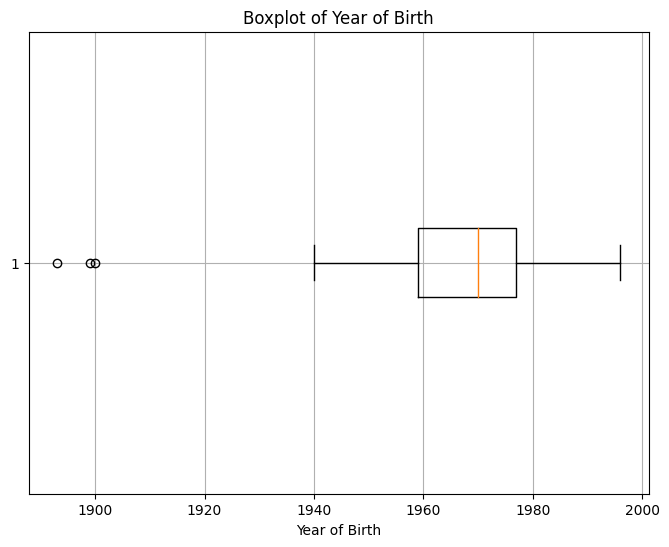

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Year_Birth'], vert=False)
plt.xlabel('Year of Birth')
plt.title('Boxplot of Year of Birth')
plt.grid()
plt.show()

ditemukan 3 outlier dengan data kelahiran mendekati dan dibawah tahun 1900, sehingga data dianggap sebagai outlier

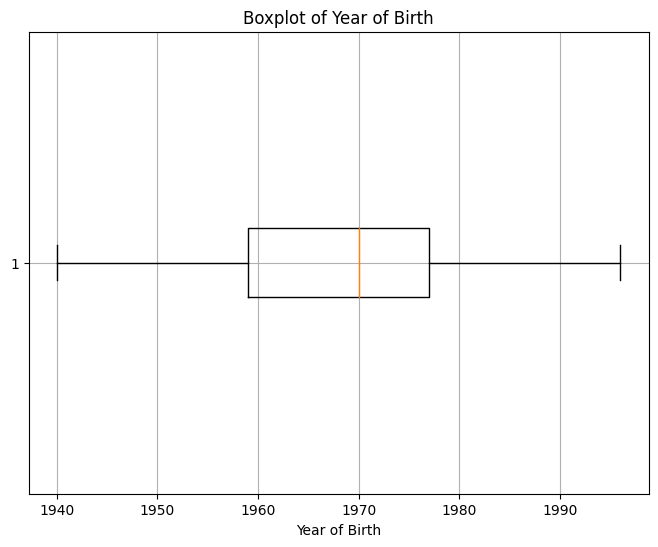

In [35]:

df.drop(df[df['Year_Birth'] < 1920].index,inplace=True)


plt.figure(figsize=(8, 6))
plt.boxplot(df['Year_Birth'], vert=False)
plt.xlabel('Year of Birth')
plt.title('Boxplot of Year of Birth')
plt.grid()
plt.show()

#### **Handling Outlier `Income`**

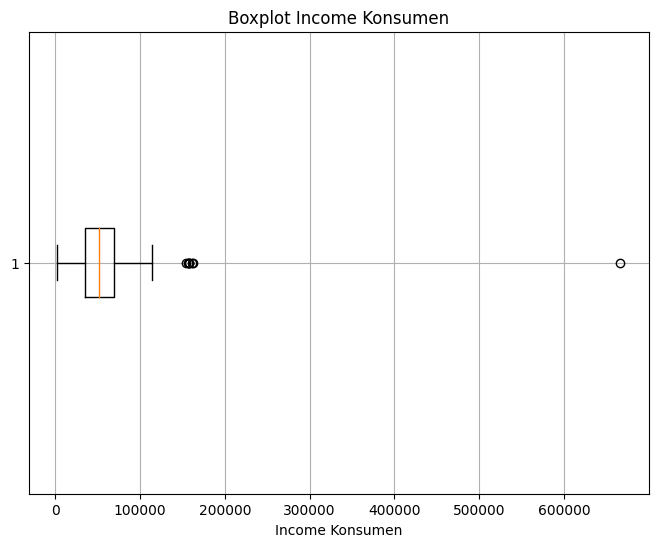

In [36]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Income'], vert=False)
plt.xlabel('Income Konsumen')
plt.title('Boxplot Income Konsumen')
plt.grid()
plt.show()

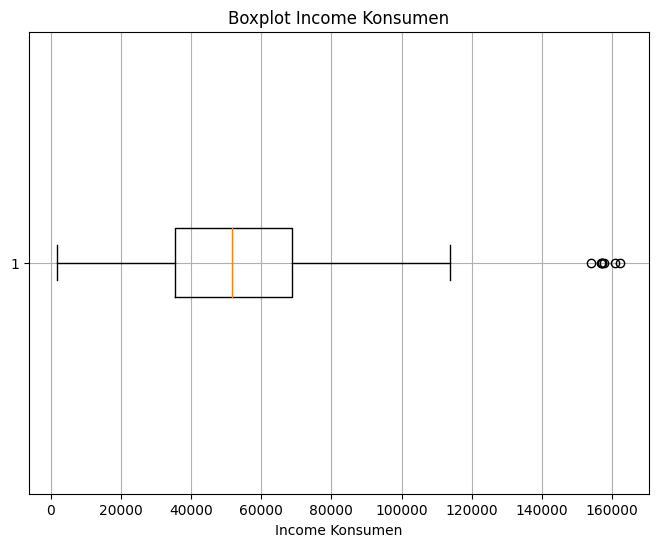

In [37]:
#drop Income yang lebih dari 200000
df.drop(df[df['Income'] > 200000].index,inplace=True)

plt.figure(figsize=(8, 6))
plt.boxplot(df['Income'], vert=False)
plt.xlabel('Income Konsumen')
plt.title('Boxplot Income Konsumen')
plt.grid()
plt.show()

Jarak Outlier Terluar pada kolom income setelah melakukan drop row tidak terlalu jauh dari IQR3

### **2.5 Modifying Columns**

In [38]:
display(df['Z_CostContact'].value_counts(),df['Z_Revenue'].value_counts())

3    2027
Name: Z_CostContact, dtype: int64

11    2027
Name: Z_Revenue, dtype: int64

In [39]:
# menghapus kolom irelevan
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1)

kolom **Z_CostContact** dan **Z_Revenue** di drop karena memiliki nilai yang identik di setiap barisnya

Menambahkan Kolom **Monetary** sebagai total spends masing masing pelanggan dan **Frequency** sebagai total frekuens transaksi pelanggan di semua platform

In [40]:
#Menambahkan Kolom Monetary dan Frequency
df.insert(df.columns.get_loc('NumStorePurchases') + 1, 'Frequency', df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1))

df.insert(df.columns.get_loc('MntGoldProds') + 1, 'Monetary', df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,3,4,0,0,0,0,0,0,0
2235,10870,1967,Graduation,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


In [41]:
# Menampilkan data yang frekuensinya 0 
df[df['Frequency']==0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,1,0,1,6,0,0,0,0,0,14,0,0,0,0,0,0,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,1,1,1,8,15,0,0,0,0,20,0,0,0,0,0,0,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,5,0,0,0,0,0,14,0,0,0,0,0,0,0
1846,9931,1963,PhD,Together,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,9,15,0,0,0,0,19,0,0,0,0,0,0,0
2132,11181,1949,PhD,Together,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0


ditemukan data pelanggan yang frekuensi transaksinya dalam 2 tahun terakhir 0 tapi tercatat data pembeliannya,
data ini akan dianggap anomali sehingga akan di drop 

In [42]:
# Mengambil index dari data yang frekuensinya 0 untuk di drop
an1=df[df['Frequency']==0].index
df.drop(an1,inplace=True)
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,3,4,0,0,0,0,0,0,0
2235,10870,1967,Graduation,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


Selanjutnya akan membuat kolom `Generation` untuk mengklasifikasikan tahun kelahiran pelanggan berdasarkan pendefinisian [Generation Wikipedia](https://en.wikipedia.org/wiki/Generation)


In [43]:
# Mengklasifikasikan data kelahiran customer berdasarkan generasinya
def defGen(year):
    if year < 1946:
        return 'Silent Generation'
    elif year >= 1946 and year < 1965:
        return 'Baby Boomer'
    elif year >= 1965 and year < 1981:
        return 'Gen X'
    elif year >= 1981 and year < 1997:
        return 'Millennials'
    else:
        return 'Gen Z'

# Menerapkan fungsi untuk membuat kolom 'Generation' baru

df.insert(df.columns.get_loc('Year_Birth')+1,'Generation',df['Year_Birth'].apply(defGen))

df

,ID,Year_Birth,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Baby Boomer,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,2174,1954,Baby Boomer,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,4141,1965,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,6182,1984,Millennials,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,5324,1981,Millennials,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Millennials,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,3,4,0,0,0,0,0,0,0
2235,10870,1967,Gen X,Graduation,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2237,7270,1981,Millennials,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,8235,1956,Baby Boomer,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


In [44]:
df.columns

Index(['ID', 'Year_Birth', 'Generation', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Monetary', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Frequency',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [45]:
# mengubah urutan kolom
df = df.reindex(columns=['ID', 'Year_Birth', 'Generation', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Monetary', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Frequency',
       'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response','Complain'])

In [46]:
# Mereset indeks dan menghapus kolom tambahan
df.reset_index(inplace=True)
df = df.drop(columns=['index'], axis=1)
df

,ID,Year_Birth,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,5524,1957,Baby Boomer,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,1,0
1,2174,1954,Baby Boomer,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,4141,1965,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,6182,1984,Millennials,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,5324,1981,Millennials,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8080,1986,Millennials,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,3,4,0,0,0,0,0,0,0
2017,10870,1967,Gen X,Graduation,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2018,7270,1981,Millennials,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,0,0,1,0,0,0
2019,8235,1956,Baby Boomer,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


Menambahkan Kolom `preferredPlatform` sebagai menunjukkan dimana biasanya setiap konsumen bertransaksi

In [47]:
# Setel nilai kolom 'preferredPlatform' berdasarkan kondisi

df.loc[(df['NumWebPurchases'] > df['NumCatalogPurchases']) & (df['NumWebPurchases'] > df['NumStorePurchases']), 'preferredPlatform'] = 'Web'
df.loc[(df['NumStorePurchases'] > df['NumCatalogPurchases']) & (df['NumStorePurchases'] > df['NumWebPurchases']), 'preferredPlatform'] = 'Store'
df.loc[(df['NumCatalogPurchases'] > df['NumStorePurchases']) & (df['NumCatalogPurchases'] > df['NumWebPurchases']), 'preferredPlatform'] = 'Catalog'

# Handle kasus jika dua dari tiga platform memiliki jumlah pembelian yang sama atau semua tiga platform memiliki jumlah yang sama
df.loc[((df['NumWebPurchases'] == df['NumCatalogPurchases']) & (df['NumWebPurchases'] > df['NumStorePurchases'])) |
       ((df['NumWebPurchases'] == df['NumStorePurchases']) & (df['NumWebPurchases'] > df['NumCatalogPurchases'])) |
       ((df['NumCatalogPurchases'] == df['NumStorePurchases']) & (df['NumCatalogPurchases'] > df['NumWebPurchases'])) |
       ((df['NumWebPurchases'] == df['NumCatalogPurchases']) & (df['NumWebPurchases'] == df['NumStorePurchases'])), 'preferredPlatform'] = 'No Preference'

In [48]:
df

,ID,Year_Birth,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,preferredPlatform
0,5524,1957,Baby Boomer,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,1,0,Catalog
1,2174,1954,Baby Boomer,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,Store
2,4141,1965,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,Store
3,6182,1984,Millennials,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,Store
4,5324,1981,Millennials,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8080,1986,Millennials,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,3,4,0,0,0,0,0,0,0,Store
2017,10870,1967,Gen X,Graduation,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0,Web
2018,7270,1981,Millennials,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,0,0,1,0,0,0,Store
2019,8235,1956,Baby Boomer,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0,Store


Setelah melakukan proses data cleaning telah didrop sebanyak **217 rows dan 2 kolom** menambahkan **4** kolom `Generation`, `Monetary`, `Frequency`, `preferredPlatform`, Mengubah value pada kolom `Marital_Status`, `Education`.

# **3. Data Analysis**

### **1. Bagaimana pola transaksi pelanggan supermarket?**
Pola transaksi pelanggan dapat diungkap melalui **analisis RFM**, yang mengacu pada tiga faktor kunci: `Recency` (seberapa baru pelanggan melakukan pembelian), `Frequency` (seberapa sering pelanggan melakukan pembelian), dan `Monetary` (berapa banyak uang yang dihabiskan pelanggan). Analisis RFM ini membantu dalam **memahami tingkat keterlibatan** dan **mengidentifikasi segmentasi** yang berpotensi untuk perbaikan penjualan.

In [49]:
# membuat DataFrame berisi data yang diperlukan untuk analisis RFM
rfm_df=df[['ID','Dt_Customer','Recency','Frequency','Monetary']]
rfm_df

,ID,Dt_Customer,Recency,Frequency,Monetary
0,5524,2012-09-04,58,22,1617
1,2174,2014-03-08,38,4,27
2,4141,2013-08-21,26,20,776
3,6182,2014-02-10,26,6,53
4,5324,2014-01-19,94,14,422
...,...,...,...,...,...
2016,8080,2012-08-17,50,3,22
2017,10870,2013-06-13,46,16,1341
2018,7270,2014-01-25,91,18,1241
2019,8235,2014-01-24,8,21,843


In [50]:
# Menghitung peringkat (rank) untuk kolom 'Recency', 'Frequency', dan 'Monetary' dalam DataFrame 'rfm_df'.

rfm_df['R_Rank']= rfm_df['Recency'].rank(ascending =True, method ='dense')
rfm_df['F_Rank']= rfm_df['Frequency'].rank(ascending =False, method ='dense')
rfm_df['M_Rank']= rfm_df['Monetary'].rank(ascending =False, method ='dense')

# Menggunakan pd.qcut untuk membagi data dalam kolom 'R_Rank' ke dalam 4 quartile dan memberikan label quartile dari 4 (kuartil teratas) hingga 1 (kuartil terbawah).
r_quartiles = pd.qcut(rfm_df['R_Rank'],4, labels=range(4,0,-1))

# Menggunakan pd.cut untuk membagi data dalam kolom 'F_Rank' dan 'M_Rank' ke dalam 4 quartile dan memberikan label quartile dari 4 (kuartil teratas) hingga 1 (kuartil terbawah).
f_quartiles = pd.cut(rfm_df['F_Rank'],4,labels=range(4,0,-1))
m_quartiles = pd.cut(rfm_df['M_Rank'],4, labels=range(4,0,-1))

# Menambahkan kolom 'R', 'F', dan 'M' ke dalam DataFrame 'rfm_df' sesuai dengan hasil pembagian quartile yang telah dihitung.
rfm_df = rfm_df.assign(R = r_quartiles)
rfm_df = rfm_df.assign(F = f_quartiles)
rfm_df = rfm_df.assign(M = m_quartiles)

# Mengubah kolom 'R', 'F', 'M' menjadi str
rfm_df['R'] = rfm_df['R'].astype(str)
rfm_df['F'] = rfm_df['F'].astype(str)
rfm_df['M'] = rfm_df['M'].astype(str)

rfm_df['RFM Score'] =rfm_df['R']+rfm_df['F']+rfm_df['M']
rfm_df

,ID,Dt_Customer,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank,R,F,M,RFM Score
0,5524,2012-09-04,58,22,1617,59.0,11.0,147.0,2,3,4,234
1,2174,2014-03-08,38,4,27,39.0,29.0,1033.0,3,1,1,311
2,4141,2013-08-21,26,20,776,27.0,13.0,551.0,3,3,2,332
3,6182,2014-02-10,26,6,53,27.0,27.0,1007.0,3,1,1,311
4,5324,2014-01-19,94,14,422,95.0,19.0,734.0,1,2,2,122
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8080,2012-08-17,50,3,22,51.0,30.0,1038.0,2,1,1,211
2017,10870,2013-06-13,46,16,1341,47.0,17.0,255.0,3,2,4,324
2018,7270,2014-01-25,91,18,1241,92.0,15.0,295.0,1,3,3,133
2019,8235,2014-01-24,8,21,843,9.0,12.0,517.0,4,3,3,433


Akan dibuat segmentasi pelanggan berdasarkan Skoring RFM yang sudah dibuat, penjelasan mengenai segmentasinya akan dijelaskan pada tabel berikut

| Segmentasi          | Deskripsi                                                                                                                                                                                                                                                                                           |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| New Customers       | Pelanggan baru yang baru saja bergabung . Mereka belum banyak berbelanja dan belum memiliki sejarah transaksi yang signifikan.                                                                                                                                                                                                                    |
| At Risk             | Pelanggan yang aktivitas belanja mereka telah menurun dalam beberapa waktu terakhir. Mereka perlu perhatian lebih untuk mencegah mereka menjadi pelanggan yang hilang.                                                                                                                                      |
| About to Sleep      | Pelanggan yang pada awalnya aktif tetapi telah mengalami penurunan aktivitas belanja dalam beberapa waktu terakhir. Mereka memiliki potensi untuk kembali aktif jika mereka mendapatkan insentif atau penawaran khusus.                                                                                                                                               |
| Inactive           | Pelanggan dengan aktivitas belanja yang tidak banyak. Mereka dapat menjadi pelanggan yang lebih setia jika mereka terus menerima pengalaman positif .                                                                                                                                                                             |
| Champions           | Pelanggan yang sangat setia dan aktif secara teratur dalam berbelanja . Mereka adalah pelanggan yang paling berharga dan memberikan kontribusi besar terhadap pendapatan supermarket .                                                                                                                                                                       |
| Loyal Customers     | Pelanggan yang telah lama berbelanja  dan tetap setia. Mereka mungkin tidak memiliki aktivitas pembelian yang tinggi seperti Champions, tetapi tetap konsisten dalam dukungan mereka.                                                                                                                                                          |
| Potential Loyalists | Pelanggan yang baru-baru ini mulai menunjukkan aktivitas berbelanja yang lebih tinggi dan teratur. Meskipun belum sepenuhnya setia, mereka memiliki potensi untuk menjadi pelanggan setia jika pengalaman mereka terus positif.                                                                                                                                       |
| Need Attention      | Pelanggan yang telah lama tidak berbelanja dan memiliki potensi menjadi pelanggan yang hilang. Mereka memerlukan perhatian khusus untuk memotivasi mereka agar kembali aktif dalam berbelanja.                                                                                                                                                                      |


In [51]:
#Membuat fungsi segmentasi pelanggan   

def segment(rfm_df):
    rfm_score = rfm_df['RFM Score']
    digit1 = int(rfm_score[0])
    digit2 = int(rfm_score[1])
    digit3 = int(rfm_score[2])
    

    if 3 <= digit1 <= 4 and 3 <= digit2 <= 4 and 3 <= digit3 <= 4:
        return 'Champions'
    elif 3 <= digit1 <= 4 and 3 <= digit2 <= 4 and 1 <= digit3 <= 2:
        return 'Loyal Customers'
    
    elif 3 <= digit1 <= 4 and 1 <= digit2 <= 2 and 3 <= digit3 <= 4:
        return 'Potential Loyalists'
    elif 3 <= digit1 <= 4 and 1 <= digit2 <= 2 and 1 <= digit3 <= 2:
        return 'New Customers'
    
    elif 1 <= digit1 <= 2 and 3 <= digit2 <= 4 and 3 <= digit3 <= 4:
        return 'Need Attention'
    elif 1 <= digit1 <= 2 and 3 <= digit2 <= 4 and 1 <= digit3 <= 2:
        return 'About to Sleep'
    
    elif 1 <= digit1 <= 2 and 1 <= digit2 <= 2 and 3 <= digit3 <= 4:
        return 'At Risk'
    elif 1 <= digit1 <= 2 and 1 <= digit2 <= 2 and 1 <= digit3 <= 2:
        return 'Inactive'
    else:
        return 'Invalid RFM'

rfm_df['Segment']=rfm_df.apply(segment,axis=1)
rfm_df


,ID,Dt_Customer,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank,R,F,M,RFM Score,Segment
0,5524,2012-09-04,58,22,1617,59.0,11.0,147.0,2,3,4,234,Need Attention
1,2174,2014-03-08,38,4,27,39.0,29.0,1033.0,3,1,1,311,New Customers
2,4141,2013-08-21,26,20,776,27.0,13.0,551.0,3,3,2,332,Loyal Customers
3,6182,2014-02-10,26,6,53,27.0,27.0,1007.0,3,1,1,311,New Customers
4,5324,2014-01-19,94,14,422,95.0,19.0,734.0,1,2,2,122,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8080,2012-08-17,50,3,22,51.0,30.0,1038.0,2,1,1,211,Inactive
2017,10870,2013-06-13,46,16,1341,47.0,17.0,255.0,3,2,4,324,Potential Loyalists
2018,7270,2014-01-25,91,18,1241,92.0,15.0,295.0,1,3,3,133,Need Attention
2019,8235,2014-01-24,8,21,843,9.0,12.0,517.0,4,3,3,433,Champions


dari tabel diatas akan dihitung setiap segmentnya

In [52]:
rfm_df['Segment'].value_counts()

New Customers          596
Inactive               576
Need Attention         263
Champions              244
Loyal Customers         95
At Risk                 95
Potential Loyalists     76
About to Sleep          76
Name: Segment, dtype: int64

Untuk melihat **proporsi** dan **jumlah** dari segmentasi pelanggan dibuat **grafik pie** untuk melihat proporsi persentase dari setiap segmennya

<Figure size 2000x1000 with 0 Axes>

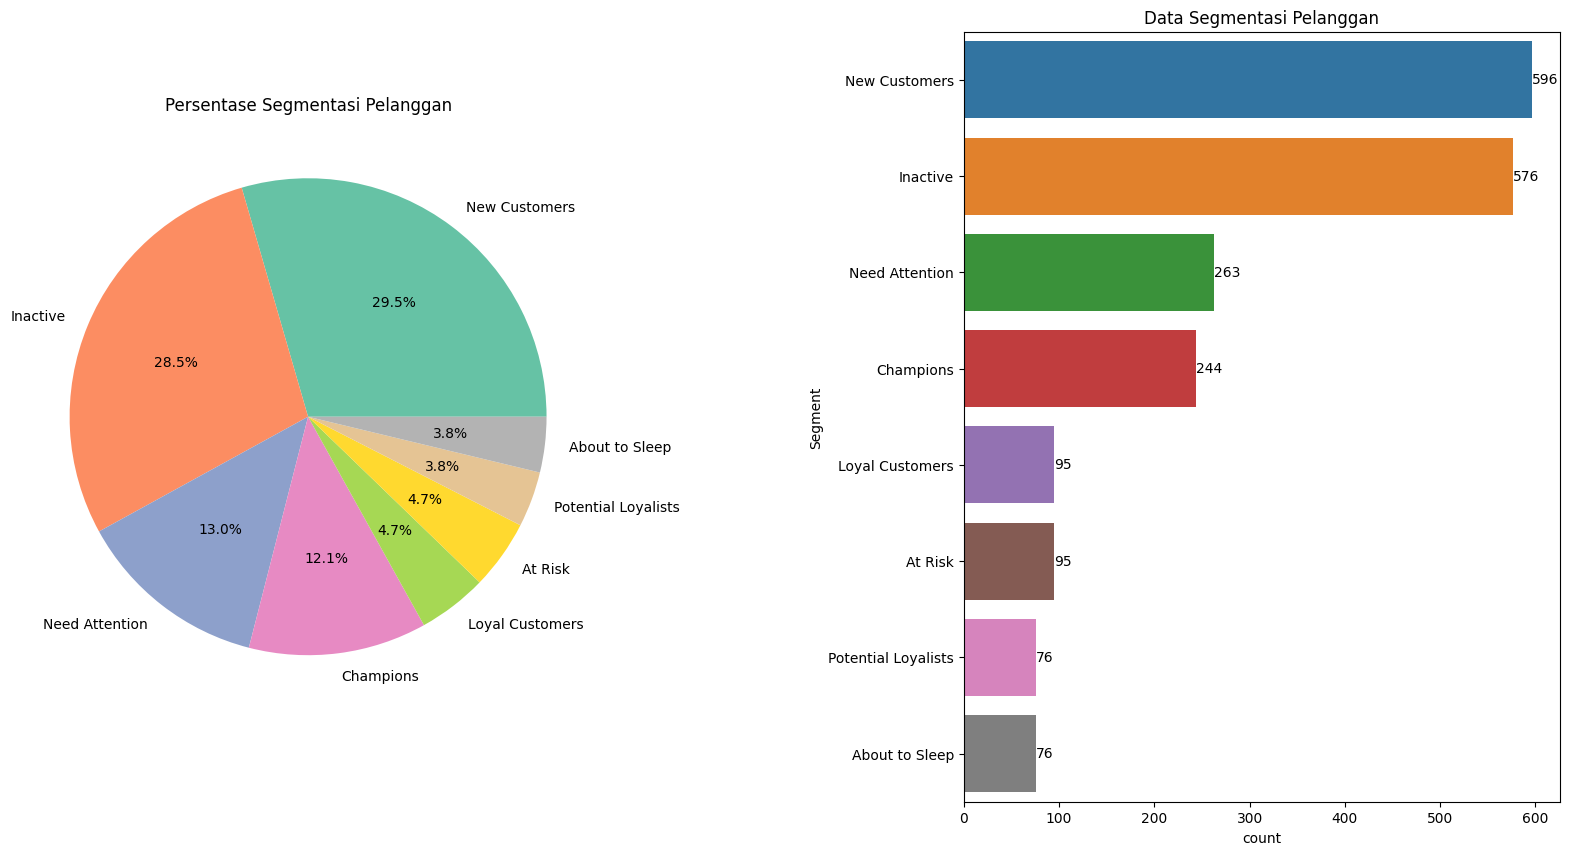

In [53]:
# Membuat piechart untuk melihat proporsi segmentasi pelanggan
segmenPelanggan = rfm_df['Segment'].value_counts()


plt.figure(figsize=(20, 10))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), gridspec_kw={'wspace': 0.6})

# Subplot pertama (pie chart)
axes[0].pie(segmenPelanggan.values, labels=segmenPelanggan.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
axes[0].set_title('Persentase Segmentasi Pelanggan')

# Subplot kedua (countplot)
bar1=sns.countplot(data=rfm_df, y='Segment', ax=axes[1] ,order=rfm_df['Segment'].value_counts().index)
axes[1].set_title('Data Segmentasi Pelanggan')
bar1.bar_label(bar1.containers[0])


plt.tight_layout()  # Mengatur tata letak subplot yang lebih baik
plt.show()

Dari grafik diatas berdasarkan Analisa RFM yang telah dilakukan memperlihatkan bahwa:

- **New Customers** (596): Segmen ini memiliki proporsi terbesar, yaitu 29,5%. Pelanggan pada segmen ini belum sering melakukan pembelian, sehingga Penting untuk mendorong pelanggan pada segmen ini untuk meningkatkan frekuensi dan nilai pembeliannya agar mereka menjadi loyal customers.
- **Inactive** (576): Segmen ini memiliki proporsi terbesar kedua, yaitu 28,5%. Pelanggan pada segmen ini telah melakukan pembelian sebelumnya, tetapi frekuensi dan nilai pembeliannya menurun. Segment ini sama seperti segment **At Risk** (95) dengan proporsi 4,7% dimana penting untuk memberikan kampanye promosi khusus untuk menarik kembali minat kepada segmen - segmen ini agar mereka tidak berhenti membeli.
- **Need Attention** (263): Segmen ini memiliki proporsi 13%. Pelanggan pada segmen ini memiliki frekuensi dan nilai pembelian yang bernilai tinggi. Penting untuk mendorong pelanggan pada segmen ini untuk belanja kembali.
- **Champions** (244): Segmen ini memiliki proporsi 12,1%. Pelanggan pada segmen ini memiliki frekuensi dan nilai pembelian yang tinggi, serta telah melakukan pembelian dalam jangka waktu yang lama. Penting untuk mempertahankan pelanggan pada segmen ini dengan memberikan penghargaan khusus dan layanan yang terbaik.
Pelanggan pada segmen ini memiliki frekuensi dan nilai pembelian yang tinggi. Penting untuk mempertahankan pelanggan pada segmen ini dengan memberikan program loyalitas dan promo khusus.
- **Loyal Customers** (95): Segmen ini memiliki proporsi 4,7%. Pelanggan pada segmen ini memiliki frekuensi dan nilai pembelian yang tinggi, serta telah melakukan pembelian dalam jangka waktu yang lama. Pelanggan pada segmen ini memiliki frekuensi dan nilai pembelian yang tinggi. Penting untuk mempertahankan pelanggan pada segmen ini dengan memberikan program loyalitas dan promo khusus agar meningkatkan nilai pembelian.
- **Potential Loyalists** (76): Segmen ini memiliki proporsi 3,8%. Pelanggan pada segmen ini memiliki nilai pembelian yang tinggi, serta telah melakukan pembelian dalam jangka waktu yang cukup lama. Penting untuk mendorong pelanggan pada segmen ini untuk meningkatkan frekuensi dan agar mereka menjadi loyal customers.
- **About to Sleep** (76): Segmen ini memiliki proporsi 3,8%. Pelanggan pada segmen ini memiliki frekuensi dan nilai pembelian yang rendah. Penting untuk mengirimkan kampanye promosi khusus untuk menarik kembali minat mereka untuk melakukan pembelian.

In [54]:
# Menggabungkan kolom 'Segment' dari 'rfm_df' ke 'df' berdasarkan indeks
df = pd.concat([df, rfm_df['Segment']], axis=1)
df

,ID,Year_Birth,Generation,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,preferredPlatform,Segment
0,5524,1957,Baby Boomer,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,1,0,Catalog,Need Attention
1,2174,1954,Baby Boomer,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,Store,New Customers
2,4141,1965,Gen X,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,Store,Loyal Customers
3,6182,1984,Millennials,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,Store,New Customers
4,5324,1981,Millennials,PhD,Together,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,Store,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8080,1986,Millennials,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,3,4,0,0,0,0,0,0,0,Store,Inactive
2017,10870,1967,Gen X,Graduation,Together,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0,Web,Potential Loyalists
2018,7270,1981,Millennials,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,0,0,1,0,0,0,Store,Need Attention
2019,8235,1956,Baby Boomer,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0,Store,Champions


### **2. Apa saja karakteristik atau profil pelanggan supermarket? apakah karakteristik pelanggan berkaitan dengan pola transaksi pelanggan?**

Untuk mengetahui bagaimana distribusi pola transaksi pelanggan terhadap karakteristik pribadi pelanggan dilakukan dengan mengamati **profil pribadi konsumen** (`Marital Status`, `Generation`, `Education`)

#### **Mengamati Marital Status**

Pertama dilakukan pengamatan dari proporsi marital status dari setiap konsumen menggunakan pie chart

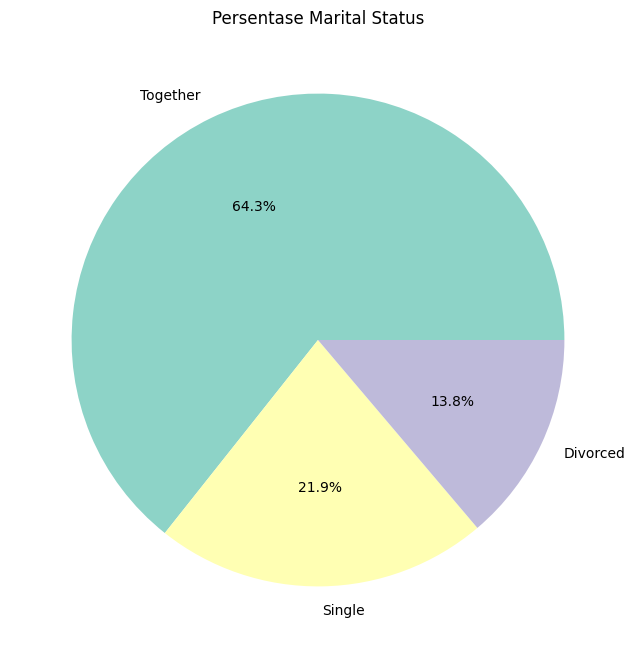

In [55]:
# Membuat piechart untuk melihat proporsi marital status
liniProduct = df['Marital_Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(liniProduct.values, labels=liniProduct.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Persentase Marital Status')
plt.show()

Dari grafik diatas **64%** dari konsumen merupakan pelanggan yang berpasangan(Together). Lalu selanjutnya kita akan melihat segmentasi RFM dari kelompok pelanggan berpasangan

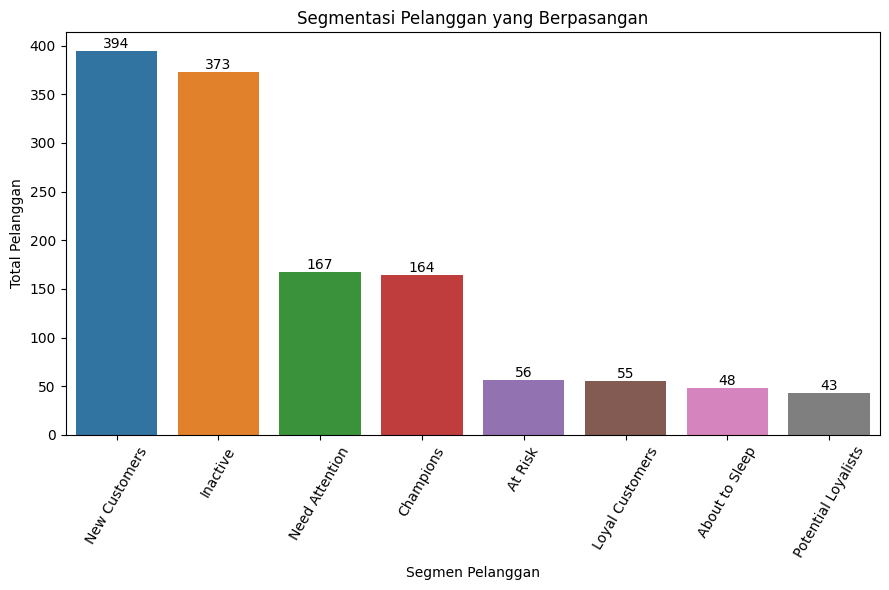

In [56]:
# Menampilkan grafik segmentasi pelanggan yang berpasangan
segmentTog= df[df['Marital_Status']=='Together']

plt.figure(figsize=(9,6))
bar1 = sns.countplot(data=segmentTog,x='Segment',order=segmentTog['Segment'].value_counts().index )

plt.title('Segmentasi Pelanggan yang Berpasangan')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Total Pelanggan')
plt.xticks(rotation=60)
plt.tight_layout()
bar1.bar_label(bar1.containers[0])
plt.show()

Berdasarkan grafik ini terlihat bahwa:

- Segmen pelanggan terbesar dari kelompok yang berpasangan adalah **New Customer** dan **Incactive**, masing-masing dengan jumlah 394 dan 373. 2 segmen tersebut merupakan segmentasi konsumen yang tingkat frekuensi dan pengeluaran yang rendah. 
    
- Segmen pelanggan terbesar selanjutnya adalah segmen **Need Attention**  dan **Champions**, masing-masing dengan jumlah 167 dan 164. 2 segmen tersebut merupakan segmentasi konsumen yang nilai resensinya dan jumlah pengeluaran yang tinggi.

#### **Mengamati Education**

Pertama dilakukan pengamatan dari proporsi marital status dari setiap konsumen menggunakan pie chart

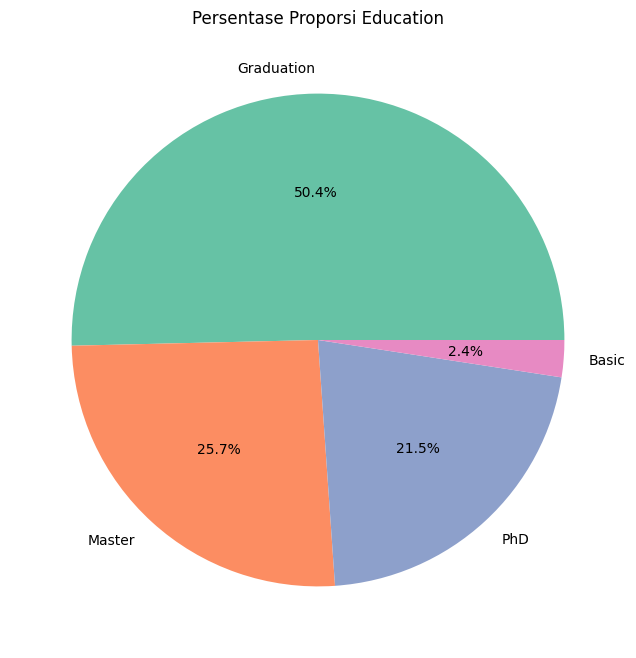

In [57]:
# Membuat piechart untuk melihat proporsi education
liniProduct = df['Education'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(liniProduct.values, labels=liniProduct.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Persentase Proporsi Education')
plt.show()

Dari grafik diatas **50.4%** dari konsumen merupakan pelanggan yang pendidikan terakhirnya sarjana (**Graduation**). Lalu selanjutnya kita akan melihat segmentasi RFM dari kelompok pelanggan dengan gelar sarjana

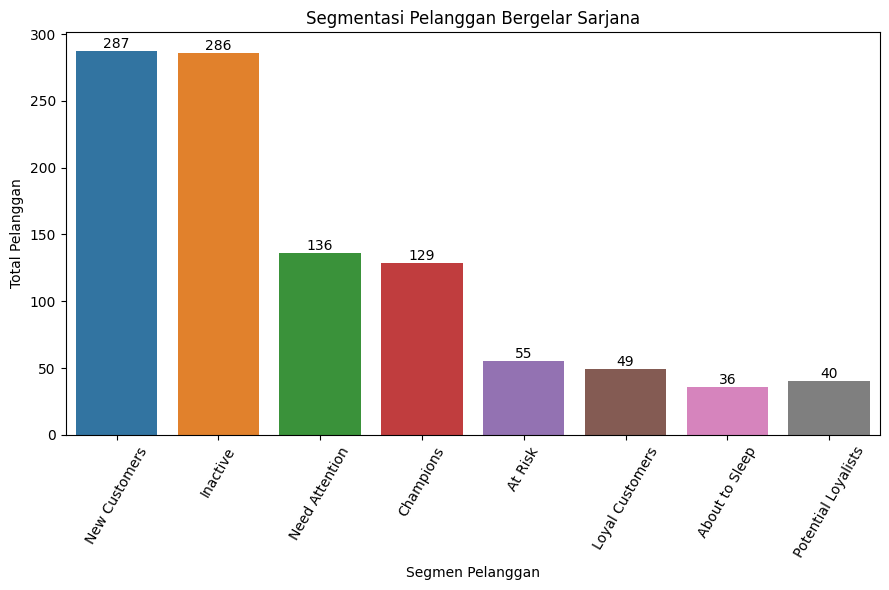

In [58]:
# Menampilkan grafik segmentasi pelanggan yang memiliki gelar sarjana
segmentGrad= df[df['Education']=='Graduation']

plt.figure(figsize=(9,6))
bar1 = sns.countplot(data=segmentGrad,x='Segment',order=segmentTog['Segment'].value_counts().index)

plt.title('Segmentasi Pelanggan Bergelar Sarjana')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Total Pelanggan') 
plt.xticks(rotation=60)
plt.tight_layout()
bar1.bar_label(bar1.containers[0],fmt='%0.0f',label_type='edge')
plt.show()

Berdasarkan grafik ini terlihat bahwa:

- Segmen pelanggan terbesar dari kelompok yang ber gelar sarjana adalah **New Customer** dan **Inactive**, masing-masing dengan jumlah 287 dan 286. 2 segmen tersebut merupakan segmentasi konsumen yang tingkat frekuensi dan pengeluaran yang rendah. 
- Segmen pelanggan terbesar selanjutnya adalah segmen **Need Attention**  dan **Champions**, masing-masing dengan jumlah 136 dan 129. 2 segmen tersebut merupakan segmentasi konsumen yang nilai resensinya dan jumlah pengeluaran yang tinggi.

#### **Mengamati Generation**

Pertama dilakukan pengamatan dari proporsi Generation dari setiap konsumen menggunakan pie chart

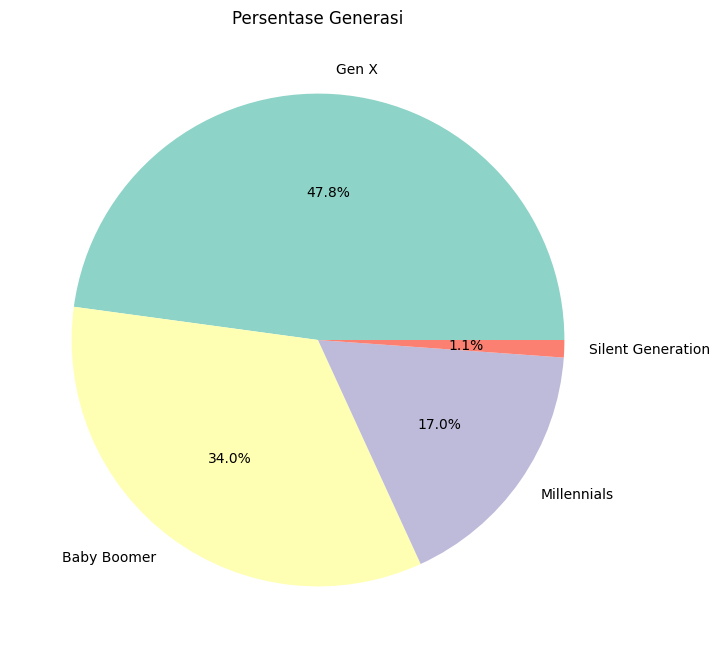

In [59]:
# Membuat piechart untuk melihat proporsi marital status
liniProduct = df['Generation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(liniProduct.values, labels=liniProduct.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Persentase Generasi')
plt.show()

Dari grafik diatas **47.8%** dari konsumen merupakan pelanggan yang dengan kelahiran dalam rentang tahun 1965 hingga 1981(**Gen X**). Lalu selanjutnya kita akan melihat segmentasi RFM dari kelompok pelanggan dari generasi X.

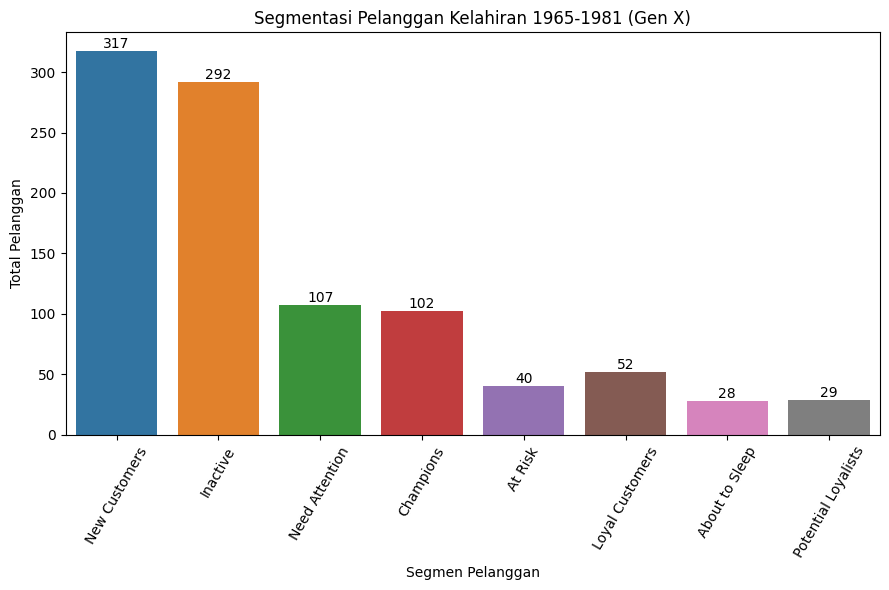

In [60]:
# Menampilkan grafik segmentasi pelanggan dengan kelahiran dalam rentang tahun 1965 hingga 1981
segmentGrad= df[df['Generation']=='Gen X']

plt.figure(figsize=(9,6))
bar1 = sns.countplot(data=segmentGrad,x='Segment',order=segmentTog['Segment'].value_counts().index)

plt.title('Segmentasi Pelanggan Kelahiran 1965-1981 (Gen X)')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Total Pelanggan')
plt.xticks(rotation=60)
plt.tight_layout()
bar1.bar_label(bar1.containers[0],fmt='%0.0f',label_type='edge')
plt.show()

Berdasarkan grafik ini terlihat bahwa:

- Segmen pelanggan terbesar dari kelompok yang ber gelar sarjana adalah **New Customer** dan **Inactive**, masing-masing dengan jumlah 317 dan 292. 2 segmen tersebut merupakan segmentasi konsumen yang tingkat frekuensi dan pengeluaran yang rendah. 
- Segmen pelanggan terbesar selanjutnya adalah segmen **Need Attention**  dan **Champions**, masing-masing dengan jumlah 107 dan 102. 2 segmen tersebut merupakan segmentasi konsumen yang nilai resensinya dan jumlah pengeluaran yang tinggi.

Dalam semua kelompok terbesar dari `Marital Status`, `Education`, `Generation` (**berpasangan**, **berpendidikan sarjana**, dan **generasi X**), segmen pelanggan terbesar adalah "**New Customer**" dan "**Inactive**." Dalam ketiga kelompok tersebut, meskipun segmen ini memiliki jumlah pelanggan yang tinggi, sayangnya kedua segmen ini memiliki tingkat frekuensi dan pengeluaran yang rendah. Ini menunjukkan perlunya upaya untuk mempertahankan dan meningkatkan keterlibatan serta pengeluaran dari segmen-segmen ini.<br>
Untuk mempertahankan dan meningkatkan keterlibatan serta pengeluaran pelanggan dalam segmen 'New Customer' dan 'Inactive,' perusahaan dapat mengambil langkah-langkah berikut ini:

- > **Program Loyalitas**: Membangun program loyalitas khusus untuk segmen "New Customer" dan "Inactive". Ini dapat mencakup insentif, diskon, atau hadiah untuk mendorong pelanggan agar lebih sering berbelanja dan meningkatkan nilai transaksi.

- >**Penawaran Khusus**: Menawarkan penawaran khusus yang disesuaikan dengan kebutuhan segmen-segmen ini juga bisa menjadi solusi. Misalnya, untuk kelompok yang berpasangan, mempromosikan barang dengan sistem bundle. atau promosi tertentu untuk lulusan universitas dari kampus terdekat

- >**Komunikasi Terarah**: Mengkomunikasikan nilai tambah produk atau layanan secara jelas kepada segmen "New Customer" dan "Inactive" dapat membantu mereka memahami manfaat yang mereka dapatkan. Ini dapat dilakukan melalui kampanye pemasaran yang tepat sasaran.

- >**Pendidikan Pelanggan**: Kadang-kadang, pelanggan dalam segmen "New Customer" dan "Inactive" tidak sepenuhnya memahami nilai produk atau layanan yang ada. Edukasi pelanggan dapat membantu meningkatkan penggunaan produk dan layanan, yang pada gilirannya dapat meningkatkan pengeluaran.

### **3. Bagaimana performansi penjualan lini produk? apakah karakteristik dan pola transaksi pelanggan mempengaruhi penjualan dari setiap lini produk?**

#### **Performansi lini produk**

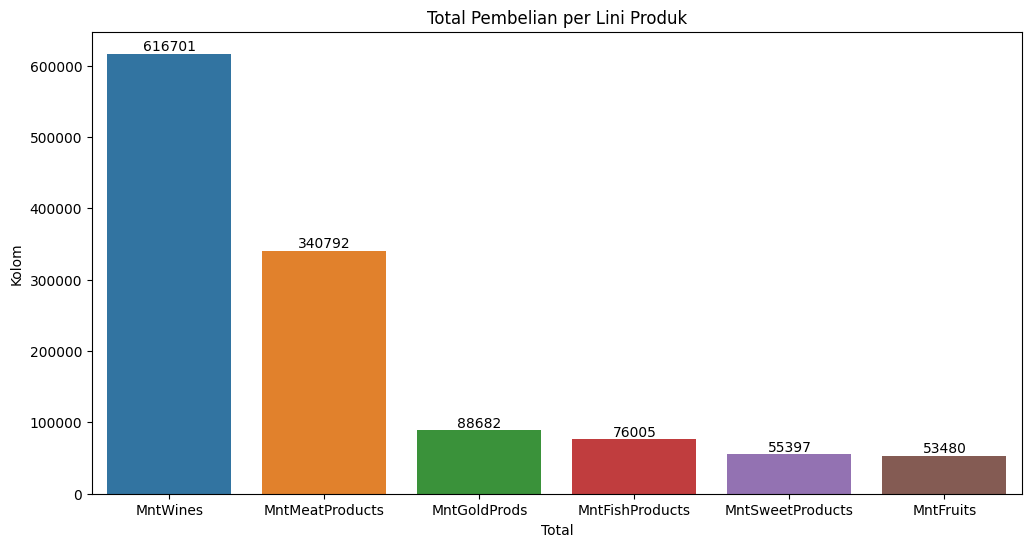

In [61]:
#Lini produk apa yang sering dibeli
liniProduct = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=liniProduct.index, y=liniProduct.values)
plt.title('Total Pembelian per Lini Produk')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

plt.show()


Dalam 2 tahun terakhir Fiction Mart:
 
 - Pelanggan mengeluarkan uang 616710 usd untuk produk Wine, menjadikan Wine produk yang paling menghasilkan, itu bisa terjadi karena menurut [wine folly][https://winefolly.com/lifestyle/reality-of-wine-prices-what-you-get-for-what-you-spend/] range harga wine adalah 4 hingga 200+ usd
 - Pelanggan mengeluarkan uang 340810 usd untuk produk Meat, menjadikan Meat produk kedua yang paling menghasilkan
 - Pelanggan mengeluarkan uang hampir sama untuk produk Fish dan Gold
 - Pelanggan mengeluarkan uang hampir sama untuk produk Sweet dan Fruit

#### **Performans Lini Produk Pengaruhnya Terhadap Komplain Pelanggan**
Dalam 2 tahun terakhir terdapat 19 pelanggan yang komplain oleh karena itu kita akan melihat bagaimana pola pembelian oleh pelanggan yang komplain

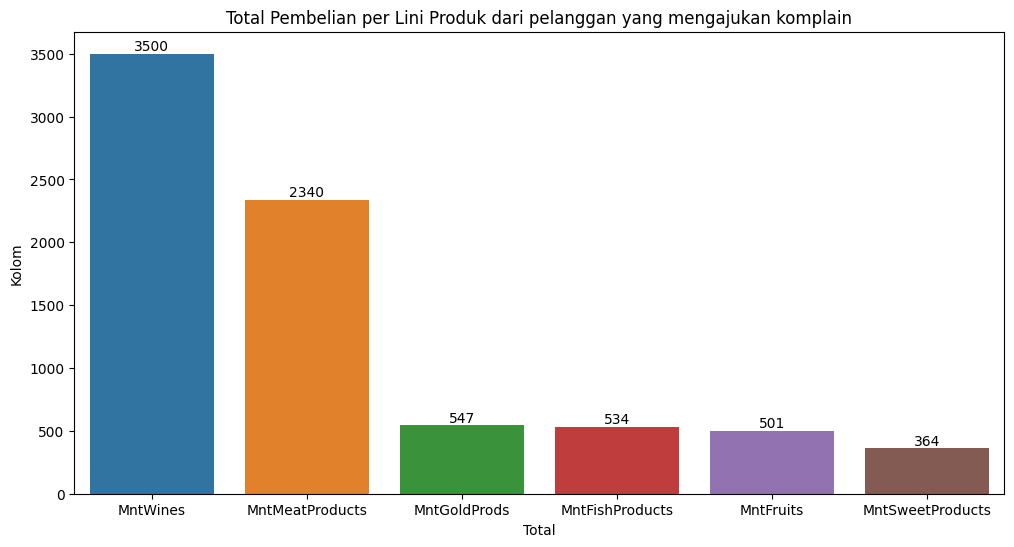

In [62]:
liniProduct = df[df['Complain']==1][['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=liniProduct.index, y=liniProduct.values)
plt.title('Total Pembelian per Lini Produk dari pelanggan yang mengajukan komplain')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

plt.show()

Dari yang 19 pelanggan yang mengajukkan komplain pola pembeliannya juga hampir mirip dengan yang tidak komplain. Oleh karena itu **Komplain tidak mempengaruhi pola pembelian**

Dari kedua grafik tersebut dapat dilihat produk **Wines** adalah produk unggulan yang dimiliki oleh Fiction Mart

Oleh karena itu berdasarkan segmen segmen pelanggan yang ada, pendekatan untuk meningkatkan wine produk yang sebaiknnya dilakukan per segmen ialah
- > Akses pertama untuk Wine kelas premium untuk Segmentasi Loyal Customer dan Champions, para pelanggan ini bisa mendapatkan free wine tasting untuk wine kelas atas sebelum dijual di supermarket
- > Untuk meningkatkan frekuensi dan resensi, setiap pembelian produk wine sejumlah tertentu dapat diberikan voucher diskon untuk ditukar untuk pembelian selanjutnya.

#### **Performansi transaksi pelanggan setiap Generasi**

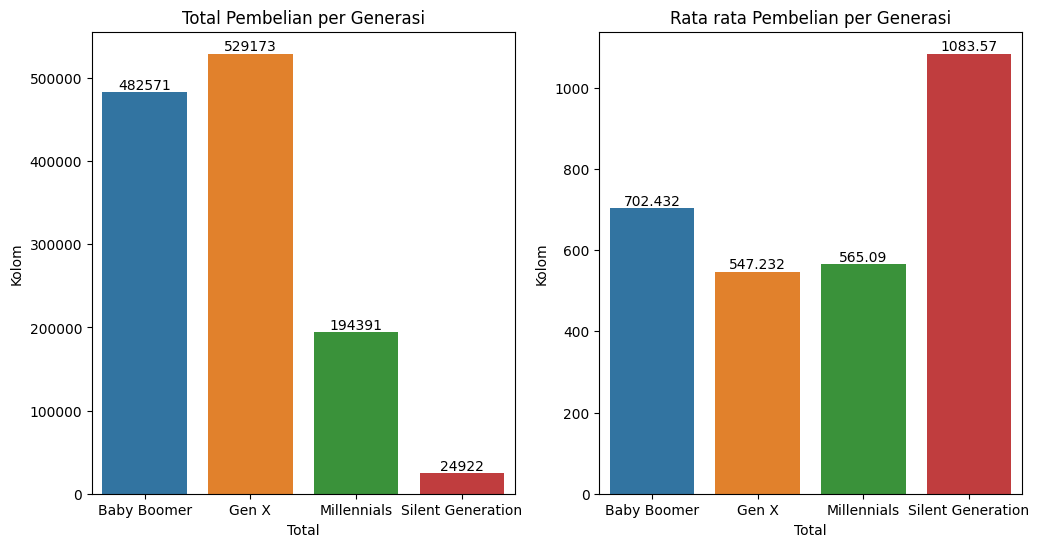

In [63]:
# mencari jumlah dan ratarata

total_spent_per_generation = df.groupby('Generation')['Monetary'].sum().reset_index()
average_spent_per_generation = df.groupby('Generation')['Monetary'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Subplot pertama
plt.subplot(1, 2, 1)
ax = sns.barplot(data=total_spent_per_generation, x='Generation', y='Monetary')
plt.title('Total Pembelian per Generasi')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

# Subplot kedua

plt.subplot(1, 2, 2)
ax = sns.barplot(data=average_spent_per_generation, x='Generation', y='Monetary')
plt.title('Rata rata Pembelian per Generasi')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

plt.show()


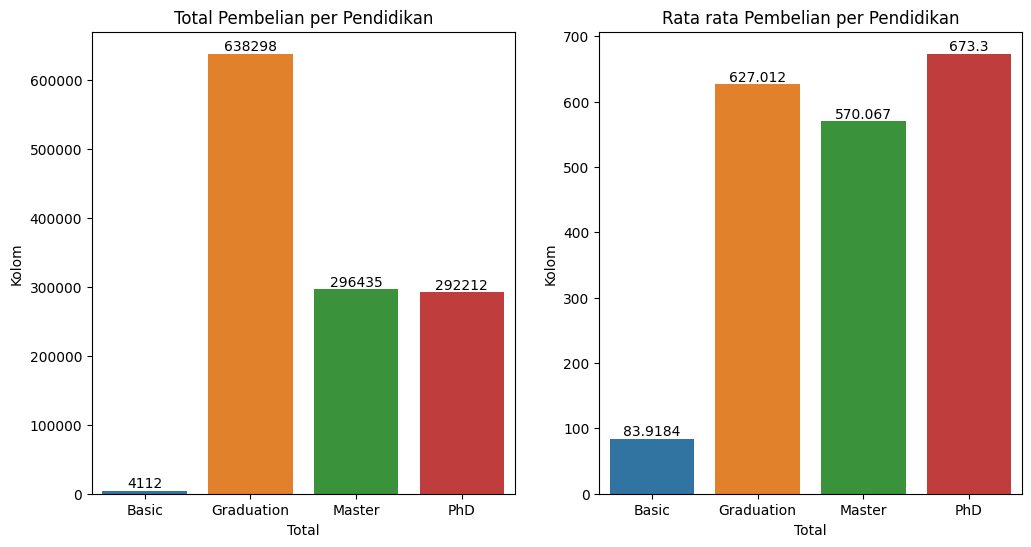

In [64]:
# mencari jumlah dan ratarata spent per pendidikan

total_spent_per_education = df.groupby('Education')['Monetary'].sum().reset_index()
average_spent_education = df.groupby('Education')['Monetary'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Subplot pertama
plt.subplot(1, 2, 1)
ax = sns.barplot(data=total_spent_per_education, x='Education', y='Monetary')
plt.title('Total Pembelian per Pendidikan')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

# Subplot kedua

plt.subplot(1, 2, 2)
ax = sns.barplot(data=average_spent_education, x='Education', y='Monetary')
plt.title('Rata rata Pembelian per Pendidikan')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

plt.show()


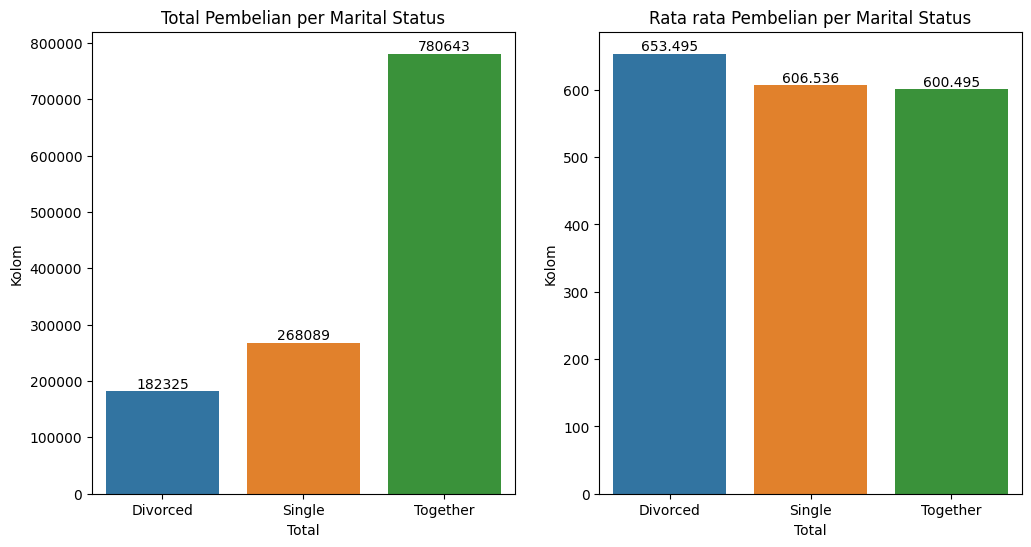

In [65]:
# mencari jumlah dan ratarata spent per marital status

total_spent_per_relationship = df.groupby('Marital_Status')['Monetary'].sum().reset_index()
average_spent_relationship = df.groupby('Marital_Status')['Monetary'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Subplot pertama
plt.subplot(1, 2, 1)
ax = sns.barplot(data=total_spent_per_relationship, x='Marital_Status', y='Monetary')
plt.title('Total Pembelian per Marital Status')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

# Subplot kedua

plt.subplot(1, 2, 2)
ax = sns.barplot(data=average_spent_relationship, x='Marital_Status', y='Monetary')
plt.title('Rata rata Pembelian per Marital Status')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

plt.show()


### **4. Bagaimana performansi platform transaksi supermarket? apakah karakteristik dan pola transaksi pelanggan mempengaruhi penjualan dari setiap lini produk?**

#### **Performansi lini Platform**

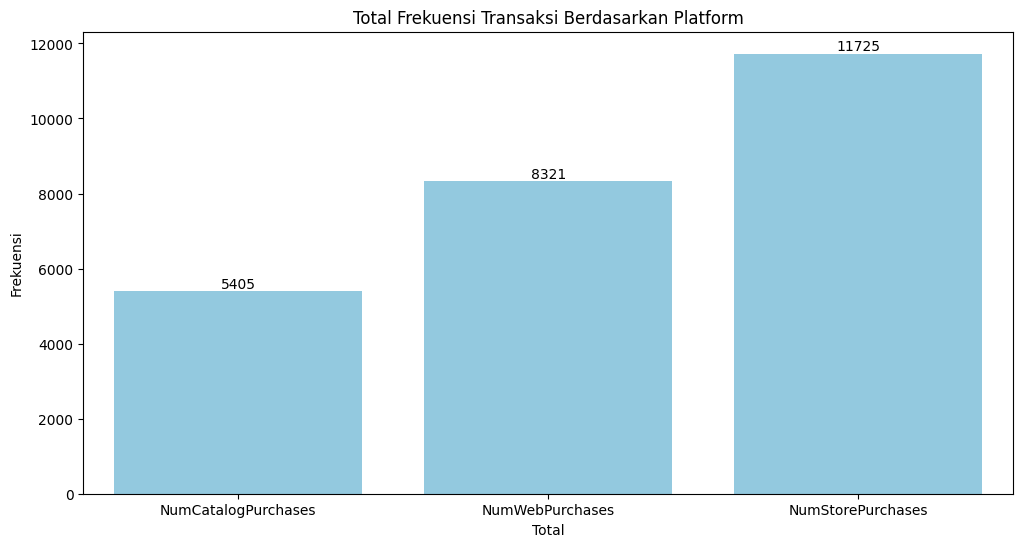

In [66]:
#Lini produk apa yang sering dibeli
liniProduct = df[['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=liniProduct.index, y=liniProduct.values, color='skyblue')
plt.title('Total Frekuensi Transaksi Berdasarkan Platform')
plt.xlabel('Total')
plt.ylabel('Frekuensi')
ax.bar_label(ax.containers[0])

plt.show()


Berdasarkan grafik ini, dapat disimpulkan bahwa:

- Platform yang paling sering digunakan adalah dengan transaksi lewat toko, dengan total frekuensi transaksi 11.725.
- Platform yang paling sedikit digunakan adalah catalog, dengan total frekuensi transaksi 5.405.

Diantara tiga platform ini, terdapat pelanggan yang mengajukan komplain. Untuk lebih memahami perilaku pelanggan yang mengajukan komplain, kami akan membuat grafik khusus untuk menganalisis lebih lanjut.

#### **Performans Lini Platform Pengaruhnya Terhadap Komplain Pelanggan**
Dalam 2 tahun terakhir terdapat 19 pelanggan yang komplain oleh karena itu kita akan melihat bagaimana pola pembelian oleh pelanggan yang komplain


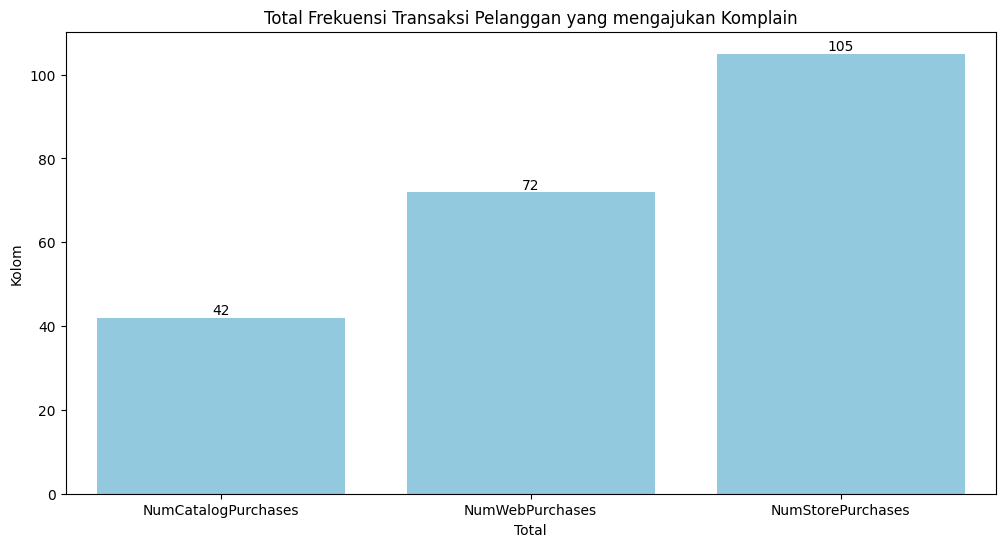

In [67]:
liniProduct = df[df['Complain']==1][['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=liniProduct.index, y=liniProduct.values, color='skyblue')
plt.title('Total Frekuensi Transaksi Pelanggan yang mengajukan Komplain')
plt.xlabel('Total')
plt.ylabel('Kolom')
ax.bar_label(ax.containers[0])

plt.show()

Dari yang 19 pelanggan yang mengajukkan komplain proporsi platform pembeliannya juga hampir mirip dengan yang tidak komplain. Oleh karena itu Komplain tidak mempengaruhi platform pembelian

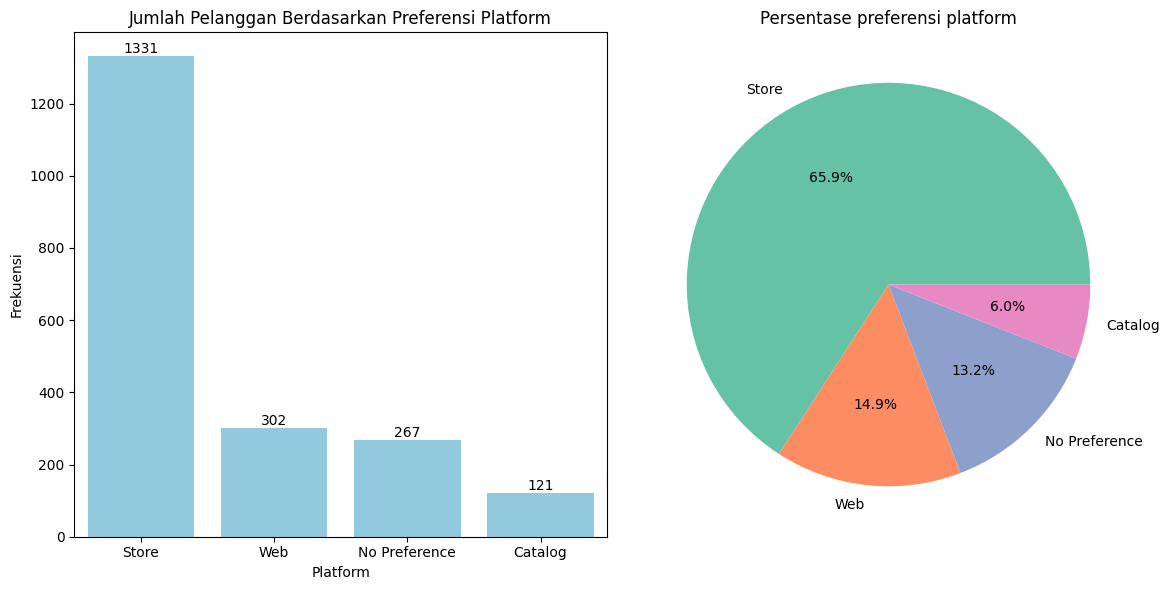

In [68]:
# Menghitung frekuensi nilai dalam kolom 'preferredPlatform'
platform_counts = df['preferredPlatform'].value_counts()

# Membuat gambar dan subplot
plt.figure(figsize=(12, 6))

# Subplot pertama
plt.subplot(1, 2, 1)
ax = sns.barplot(x=platform_counts.index, y=platform_counts.values, color='skyblue')
plt.title('Jumlah Pelanggan Berdasarkan Preferensi Platform')
plt.xlabel('Platform')
plt.ylabel('Frekuensi')
ax.bar_label(ax.containers[0])

# Subplot kedua
plt.subplot(1, 2, 2)
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Persentase preferensi platform')

plt.tight_layout()  # Mengatur tata letak subplot yang lebih baik
plt.show()

Dari Grafik diatas terlihat transaksi menggunakan platform **store** merupakan platform terfavorit pelanggan fiction mart dalam bertransaksi, diikuti dengan pelanggan menggunakan platform **Web**

#### **Segmentasi Pelanggan dengan Preferensi Transaksi**


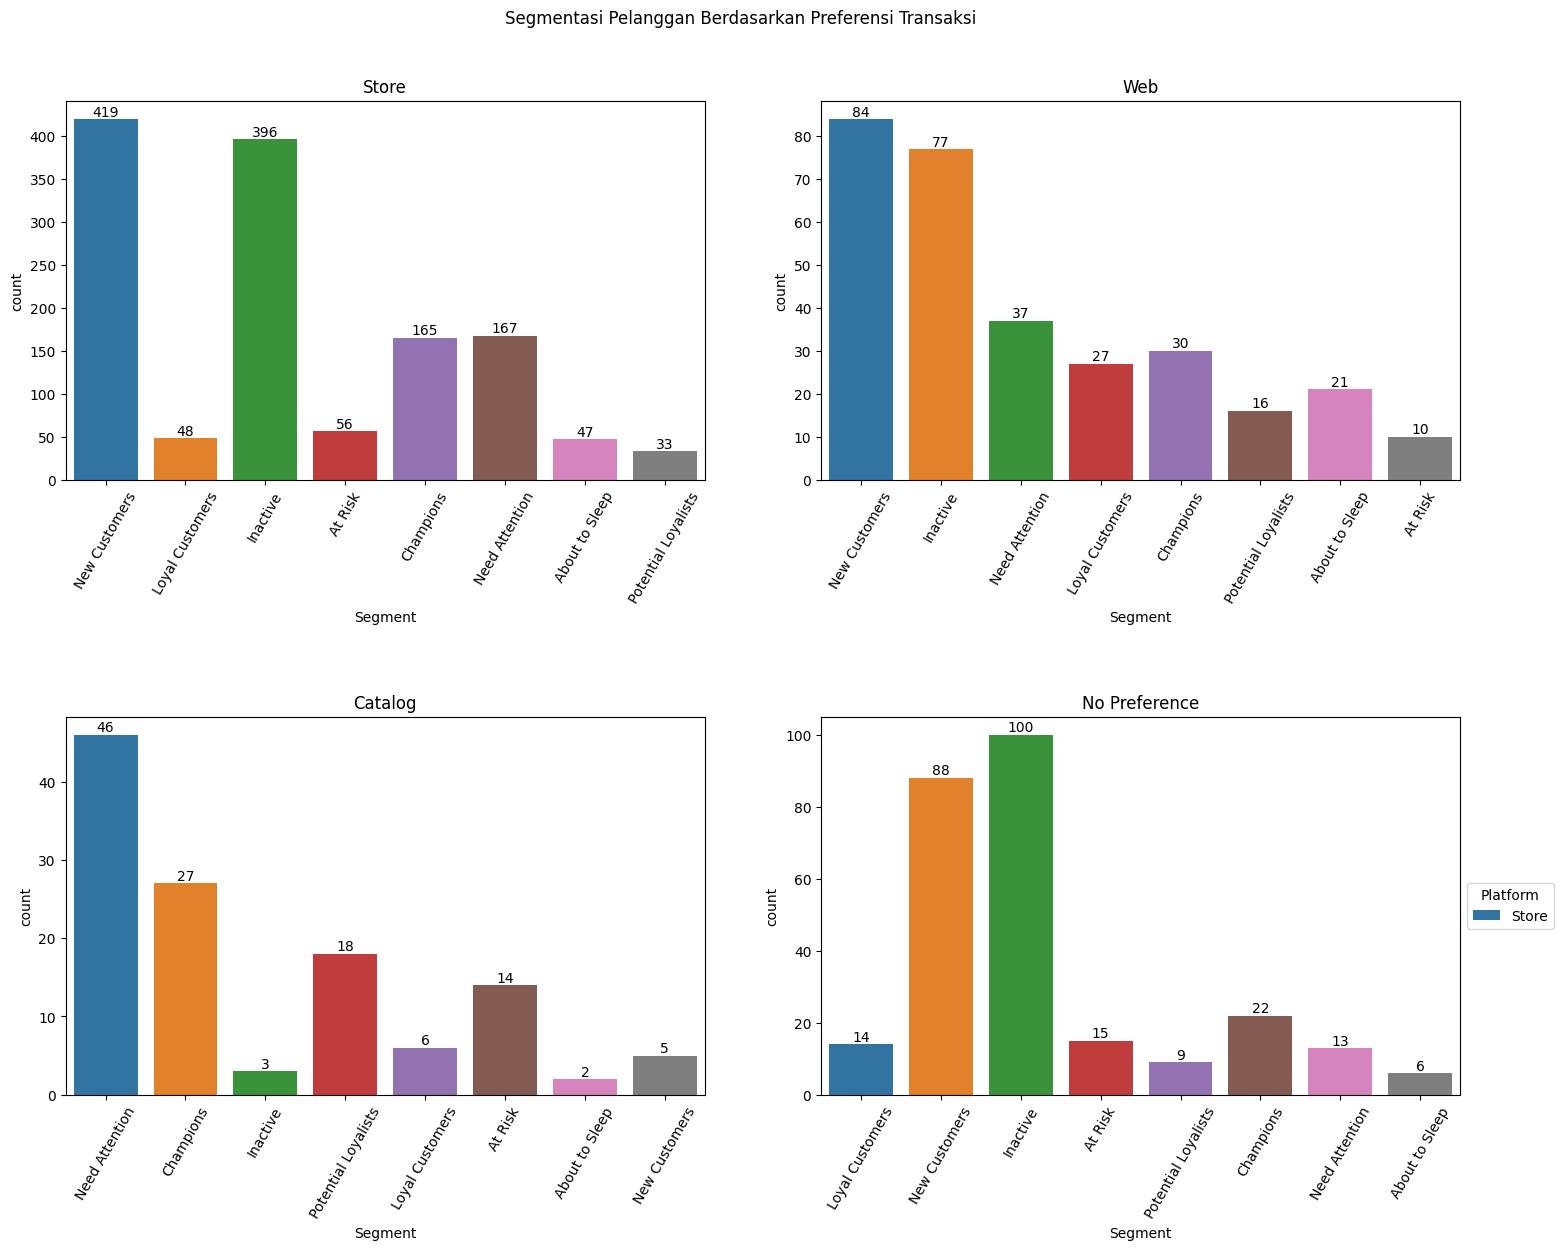

In [85]:
list_platform = ['Store', 'Web', 'Catalog', 'No Preference']
id = 0
n_rows = 2
n_cols = 2
plt.figure(figsize=(16,13))

for i in range(n_rows) :
    for j in range(n_cols) :
        plt.subplot(n_rows, n_cols, id + 1)
        plt.tight_layout(pad=5.0)
        platform= list_platform[id]
        ax = sns.countplot(data=df[df['preferredPlatform']==platform],x='Segment')
        plt.title(f'{list_platform[id]}')
        plt.xticks(rotation=60)
        ax.bar_label(ax.containers[0])
        id += 1
        

plt.suptitle("Segmentasi Pelanggan Berdasarkan Preferensi Transaksi", y=1)
plt.show()

Dari Grafik diatas dapat terlihat dari pelanggan yang memiliki preferensi belanja di selain katalog memiliki proporsi segmen yang hampir mirip, berbeda dengan katalog dengan banyaknya segmentasi pelanggan bermonetari tinggi

In [70]:
nama_file_excel = 'cleanSuperstore.xlsx'
df.to_excel(nama_file_excel, index=False)  # index=False untuk menghilangkan indeks dalam Excel

## **Kesimpulan**

Dalam semua kelompok terbesar dari `Marital Status`, `Education`, `Generation` (berpasangan, berpendidikan sarjana, dan generasi X), segmen pelanggan terbesar adalah New Customer dan Inactive Dalam ketiga kelompok tersebut, segmen ini memiliki jumlah pelanggan yang tinggi, sayangnya kedua segmen ini memiliki tingkat frekuensi dan pengeluaran yang rendah. Ini menunjukkan perlunya upaya untuk mempertahankan keterlibatan  dan meningkatkan serta pengeluaran dari segmen-segmen ini. Untuk mempertahankan dan meningkatkan keterlibatan serta pengeluaran pelanggan dalam segmen 'New Customer' dan 'Inactive,' perusahaan dapat mengambil langkah-langkah berikut ini:

- >	**Program Loyalitas**   :   Membangun program loyalitas khusus Ini dapat mencakup insentif, diskon, atau hadiah untuk mendorong pelanggan agar lebih sering berbelanja dan meningkatkan nilai transaksi.
- >**Penawaran Khusus**     :   Menawarkan penawaran khusus yang disesuaikan dengan kebutuhan segmen-segmen ini juga bisa menjadi solusi. Misalnya, untuk kelompok yang berpasangan, mempromosikan barang dengan sistem bundle. atau promosi tertentu untuk lulusan universitas dari kampus terdekat




Dari semua lini produk yang ada Wines adalah produk dengan nilai pendapatan tertinggi yang dimiliki oleh Fiction Mart
Berdasarkan segmen segmen pelanggan yang ada, pendekatan untuk meningkatkan wine produk yang sebaiknnya dilakukan per segmen ialah
- > Akses pertama untuk Wine kelas premium untuk Segmentasi Loyal Customer dan Champions, para pelanggan ini bisa mendapatkan free wine tasting untuk wine kelas atas sebelum dijual di supermarket
- > Untuk meningkatkan frekuensi dan resensi, setiap pembelian produk wine sejumlah tertentu dapat diberikan voucher diskon untuk ditukar untuk pembelian selanjutnya


Untuk lini produk lainnya yang memiliki pembelian jauh dari Wines pendekatan yang perlu dilakukan adalah
- >**Komunikasi Terarah**: Mengkomunikasikan nilai tambah produk atau layanan secara yang dapat membantu pelanggan memahami manfaat yang mereka dapatkan
- >**Pendidikan Pelanggan**: Edukasi pelanggan dapat membantu meningkatkan penggunaan produk dan layanan, yang pada gilirannya dapat meningkatkan pengeluaran.



Pelanggan yang memiliki preferensi belanja di selain katalog memiliki proporsi segmen yang hampir mirip, berbeda dengan **katalog** dengan banyaknya segmentasi pelanggan bermonetari tinggi. Meskipun dalam segmen katalog sedikit dimanfaatkan pelanggan, **Tidak direkomendasi untuk menutup layanan katalog** berdasarkan segmentasi pelanggan yang  memiliki preferensi transaksi menggunakan **katalog**

